# Defining the question

### Use unsupervised learning to learn the characteristics of customer groups of Kira Plastinina

## Metrics of success

### Unsupervised Learning

## Understanding the context

### Kira Plastinina is a Russian brand thais sold through a defunct chain of retail store in different parts of the world, for example, China and Belarus. The Brand's Sales and Marketing Team would like to understand their customer's behaviour from the data they collected oer the past year.

## Recording the Experimental Design

### Use K-Means Clustering
### use Hierachical Clustering

## Data Relevance

### The data is from Kira Plastinina. Therefore we expect the data to be relevant.

In [ ]:
# loading the data
russian <- read.csv("C:/Users/I/Downloads/online_shoppers_intention.csv")

In [2]:
# Looking at the structure of the dataset
str(russian)

'data.frame':	12330 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : Factor w/ 10 levels "Aug","Dec","Feb",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : Factor w/ 3 levels "Ne

there are 12 numerical data, 2 factors and 2 logical data

In [3]:
# Checking for the size of the dataset
dim(russian)

[1] 12330    18

there are 12,380 rows and 18 columns

In [4]:
# Checking for the column names
colnames(russian)

[1] "Administrative"          "Administrative_Duration"
 [3] "Informational"           "Informational_Duration" 
 [5] "ProductRelated"          "ProductRelated_Duration"
 [7] "BounceRates"             "ExitRates"              
 [9] "PageValues"              "SpecialDay"             
[11] "Month"                   "OperatingSystems"       
[13] "Browser"                 "Region"                 
[15] "TrafficType"             "VisitorType"            
[17] "Weekend"                 "Revenue"

the column nams are not uniform. Hence we will need to standardise them during feature engineering

In [5]:
# Previewing the top of the dataset
head(russian)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


In [6]:
# Previewing the bottom of the dataset
tail(russian)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,0,0,1,0,16,503.000,0.000000000,0.03764706,0.00000,0,Nov,2,2,1,1,Returning_Visitor,FALSE,FALSE
12326,3,145,0,0,53,1783.792,0.007142857,0.02903061,12.24172,0,Dec,4,6,1,1,Returning_Visitor,TRUE,FALSE
12327,0,0,0,0,5,465.750,0.000000000,0.02133333,0.00000,0,Nov,3,2,1,8,Returning_Visitor,TRUE,FALSE
12328,0,0,0,0,6,184.250,0.083333333,0.08666667,0.00000,0,Nov,3,2,1,13,Returning_Visitor,TRUE,FALSE
12329,4,75,0,0,15,346.000,0.000000000,0.02105263,0.00000,0,Nov,2,2,3,11,Returning_Visitor,FALSE,FALSE
12330,0,0,0,0,3,21.250,0.000000000,0.06666667,0.00000,0,Nov,3,2,1,2,New_Visitor,TRUE,FALSE


# Data Wrangling

In [7]:
# Checking for missing data in the dataset
colSums(is.na(russian))

Administrative Administrative_Duration           Informational 
                     14                      14                      14 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                     14                      14                      14 
            BounceRates               ExitRates              PageValues 
                     14                      14                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

there are 14 missing values in the first 8 features

In [8]:
# Checking for duplicates
dup_rows <- russian[duplicated(russian), ]
dup_rows

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
159,0,0,0,0,1,0,0.2,0.2,0,0,Feb,1,1,1,3,Returning_Visitor,FALSE,FALSE
179,0,0,0,0,1,0,0.2,0.2,0,0,Feb,3,2,3,3,Returning_Visitor,FALSE,FALSE
419,0,0,0,0,1,0,0.2,0.2,0,0,Mar,1,1,1,1,Returning_Visitor,TRUE,FALSE
457,0,0,0,0,1,0,0.2,0.2,0,0,Mar,2,2,4,1,Returning_Visitor,FALSE,FALSE
484,0,0,0,0,1,0,0.2,0.2,0,0,Mar,3,2,3,1,Returning_Visitor,FALSE,FALSE
513,0,0,0,0,1,0,0.2,0.2,0,0,Mar,2,2,1,1,Returning_Visitor,FALSE,FALSE
555,0,0,0,0,1,0,0.2,0.2,0,0,Mar,2,2,1,1,Returning_Visitor,FALSE,FALSE
590,0,0,0,0,1,0,0.2,0.2,0,0,Mar,2,2,1,1,Returning_Visitor,FALSE,FALSE
660,0,0,0,0,2,0,0.2,0.2,0,0,Mar,2,5,1,1,Returning_Visitor,FALSE,FALSE
775,0,0,0,0,1,0,0.2,0.2,0,0,Mar,2,2,4,1,Returning_Visitor,FALSE,FALSE


there is presence of duplicated data

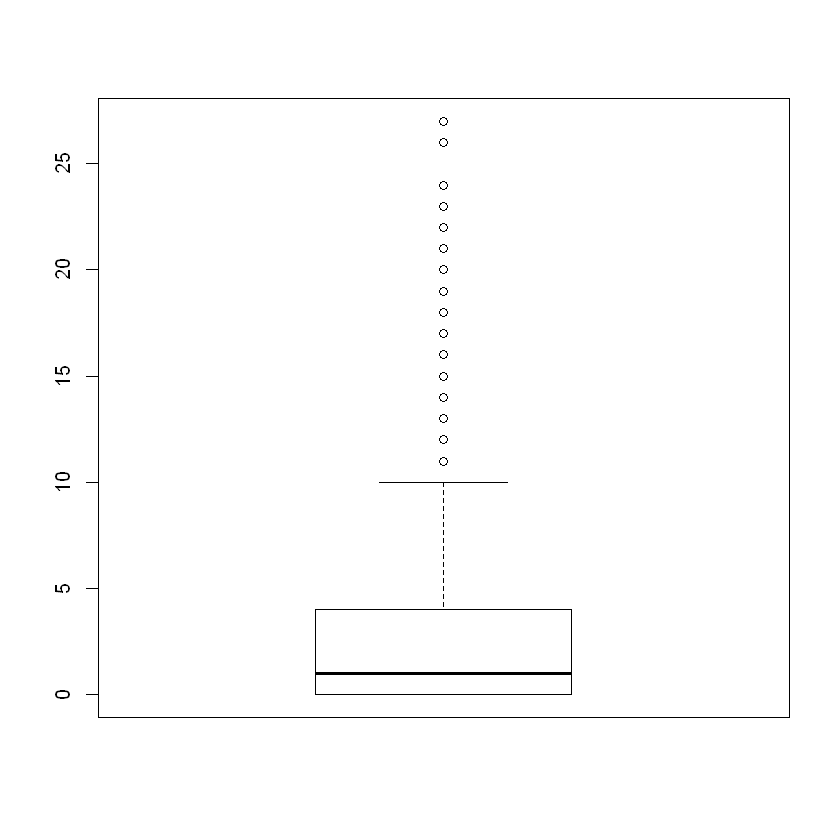

In [10]:
# Checking for outliers
boxplot(russian$Administrative)

there is presence of missing data in the administrative feature. 

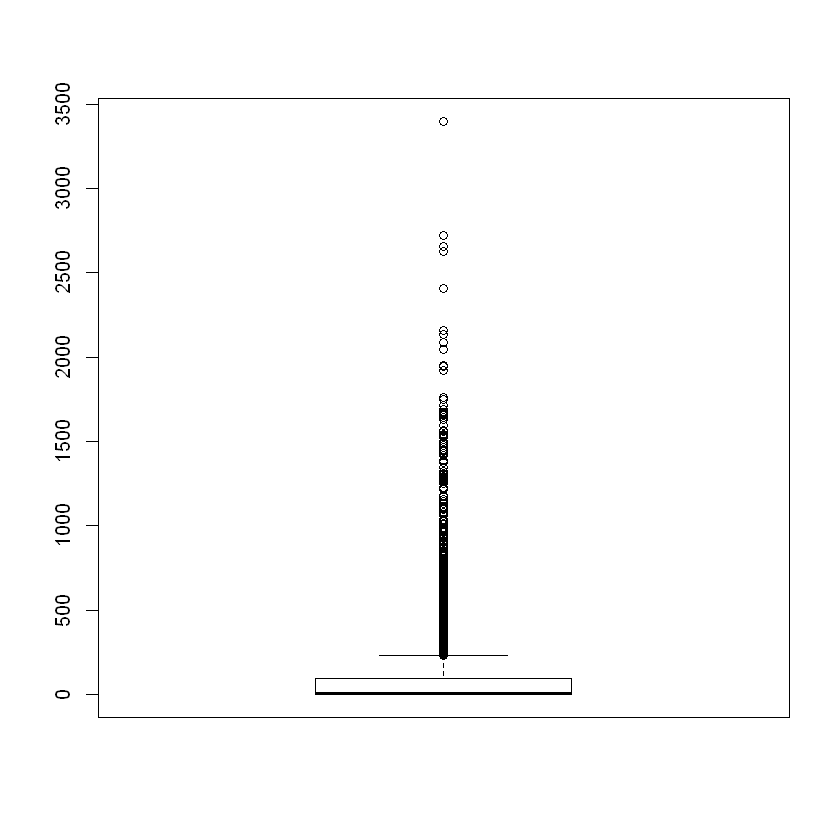

In [11]:
boxplot(russian$Administrative_Duration)

there is presence of missing data in the administrative duration feature. 

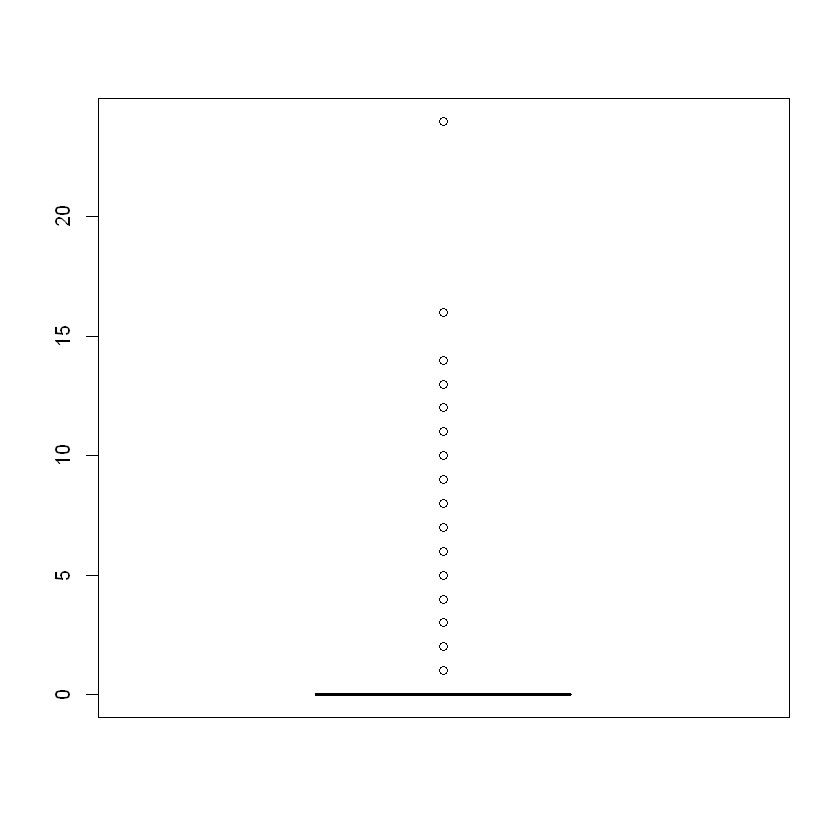

In [12]:
boxplot(russian$Informational)


there is presence of missing data in the informational feature.

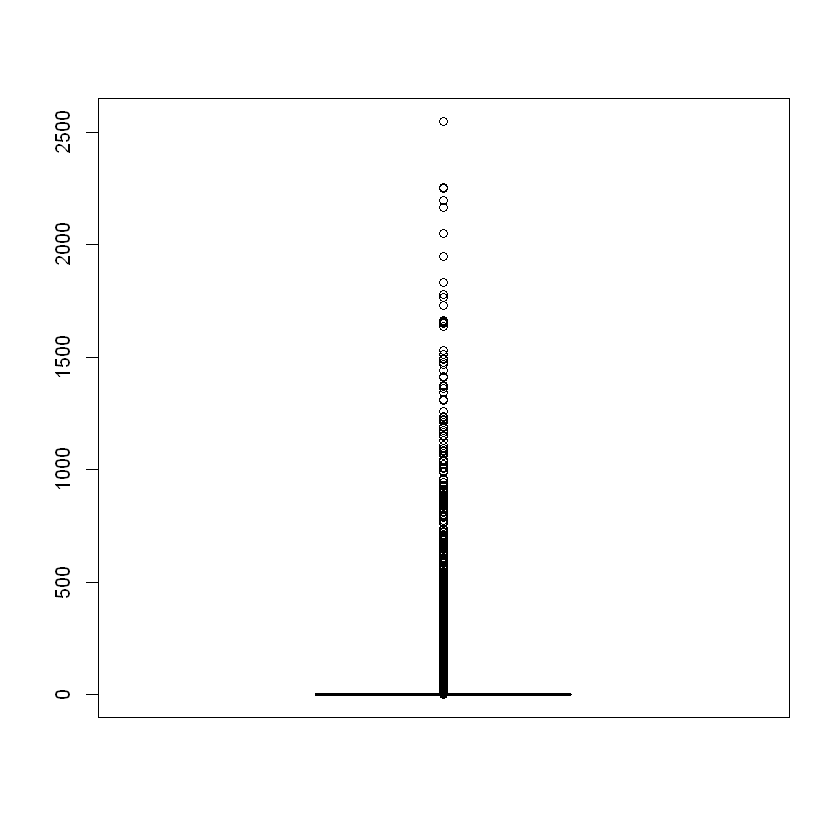

In [13]:
boxplot(russian$Informational_Duration)

there is presence of missing data in the informational duraton feature.

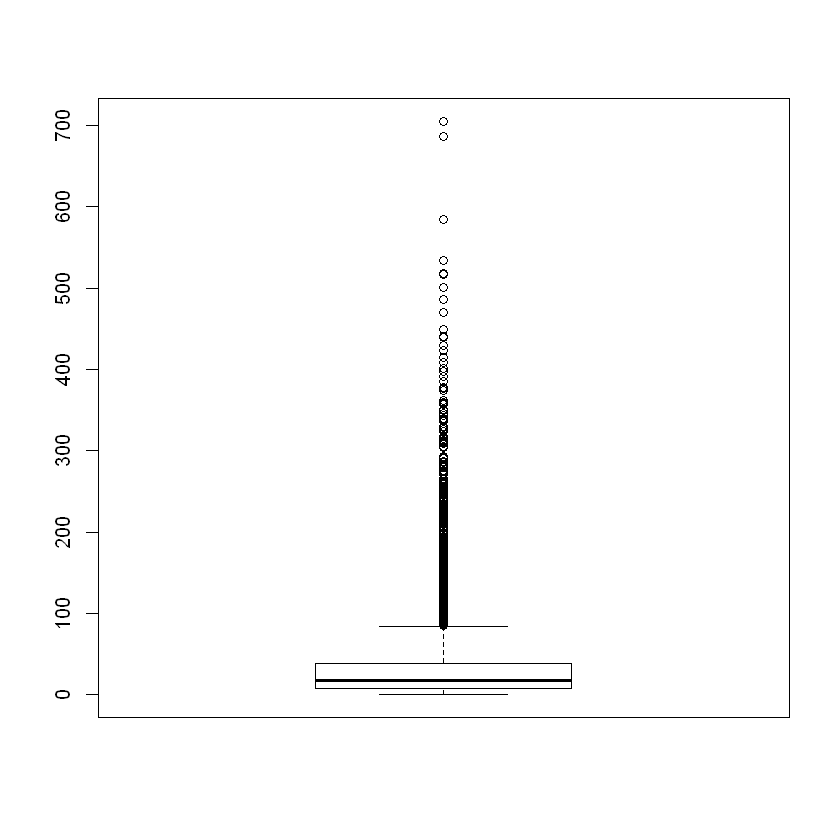

In [14]:
boxplot(russian$ProductRelated)

there is presence of missing data in the product related feature. 

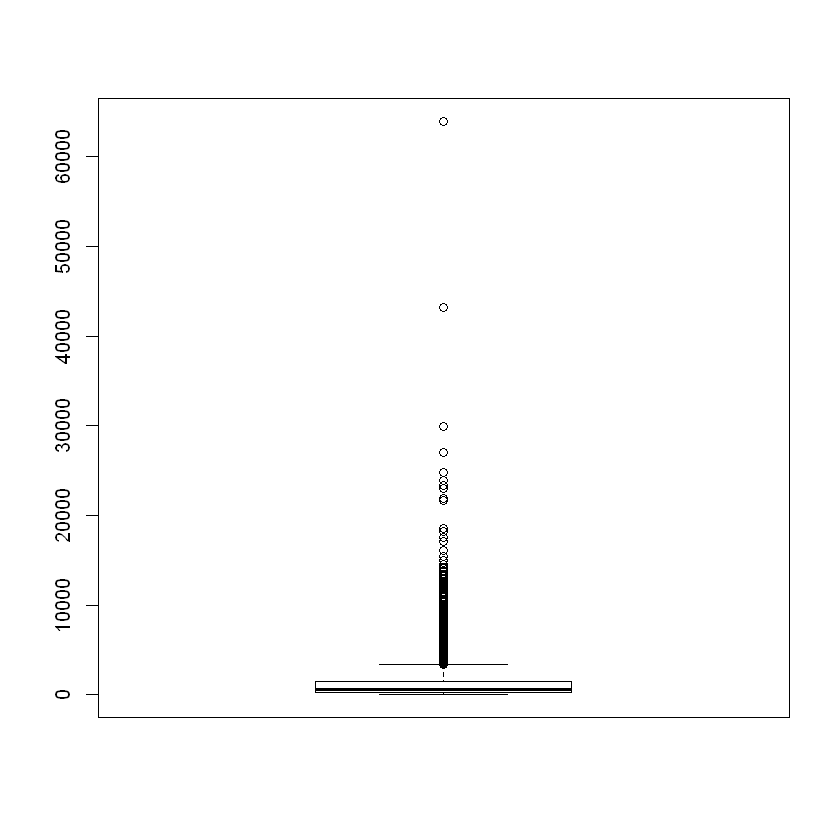

In [15]:
boxplot(russian$ProductRelated_Duration)

there is presence of missing data in the product related duration feature. 

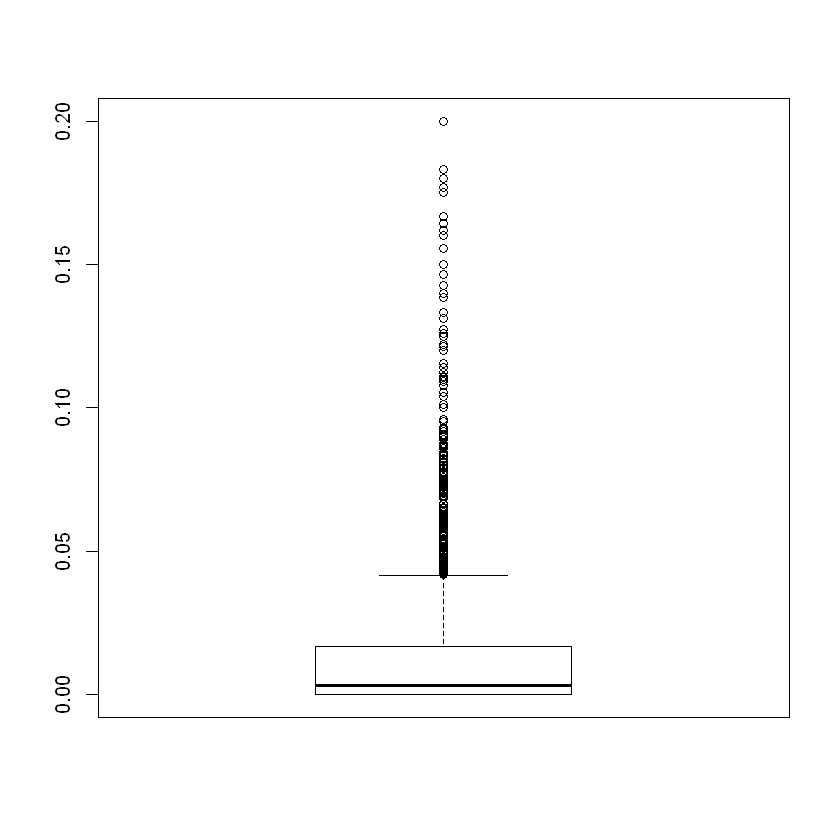

In [16]:
boxplot(russian$BounceRates)

there is presence of missing data in the bounce rates feature.

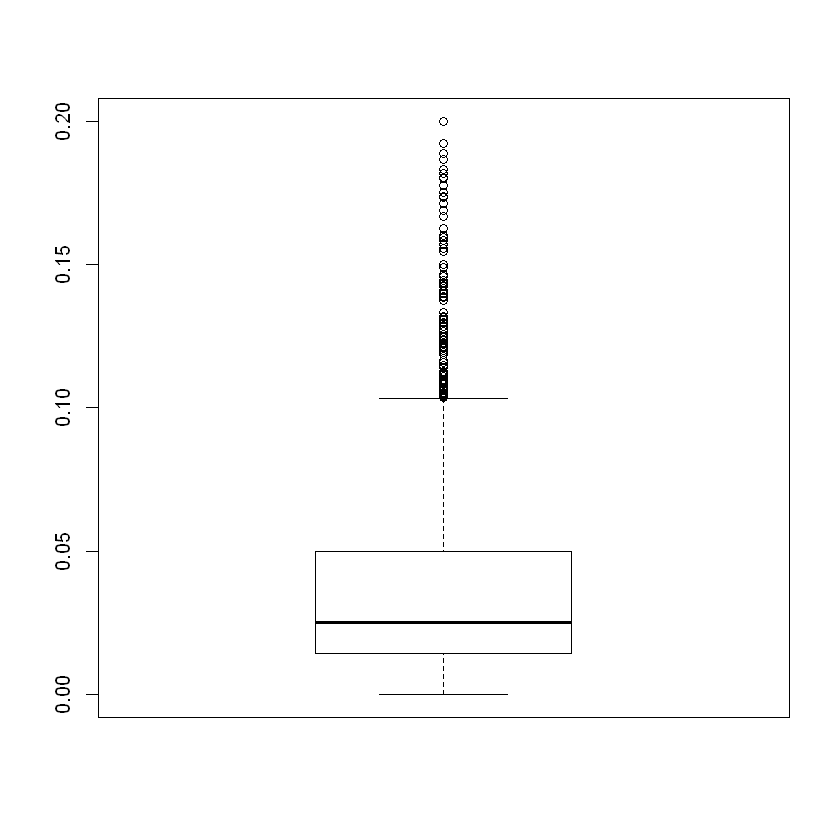

In [17]:
boxplot(russian$ExitRates)

there is presence of missing data in the exit rates feature. 

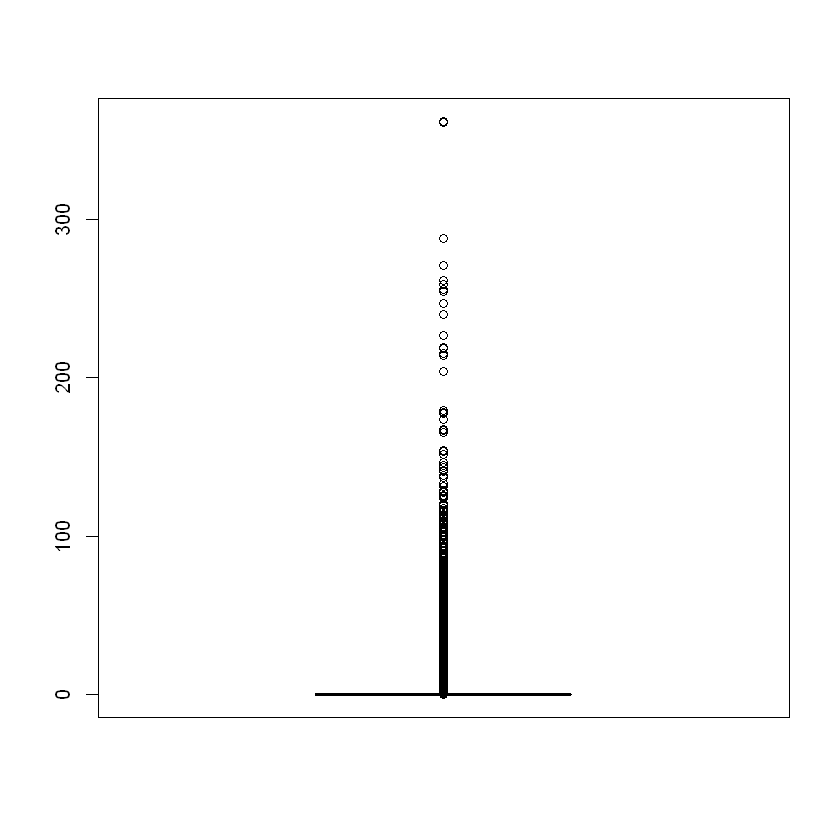

In [18]:
boxplot(russian$PageValues)

there is presence of missing data in the page values feature. 

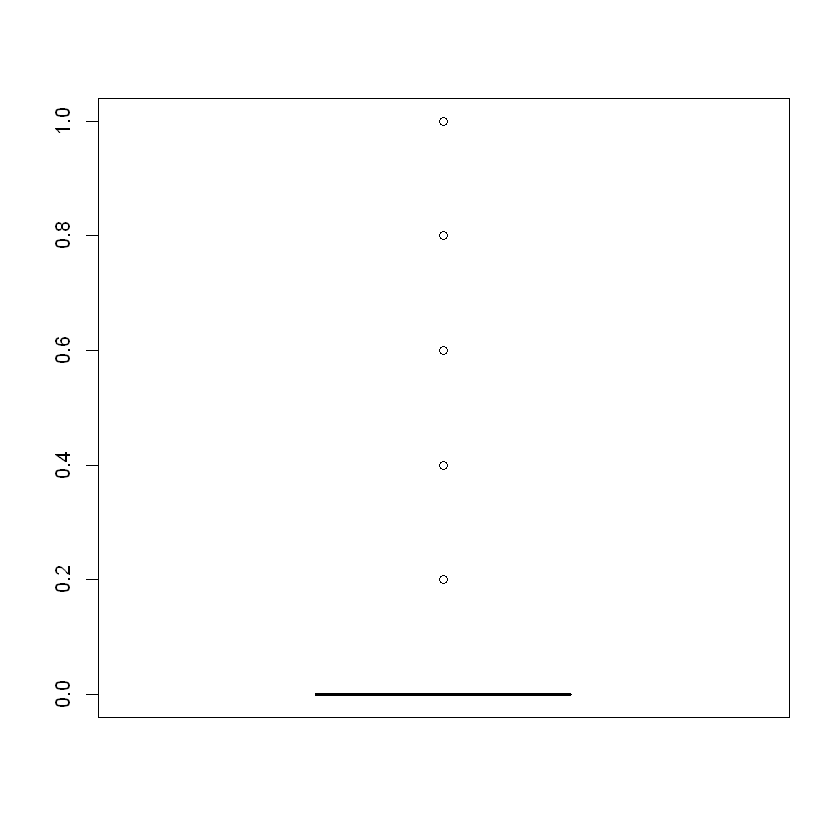

In [19]:
boxplot(russian$SpecialDay)

there is presence of missing data in the special day feature.

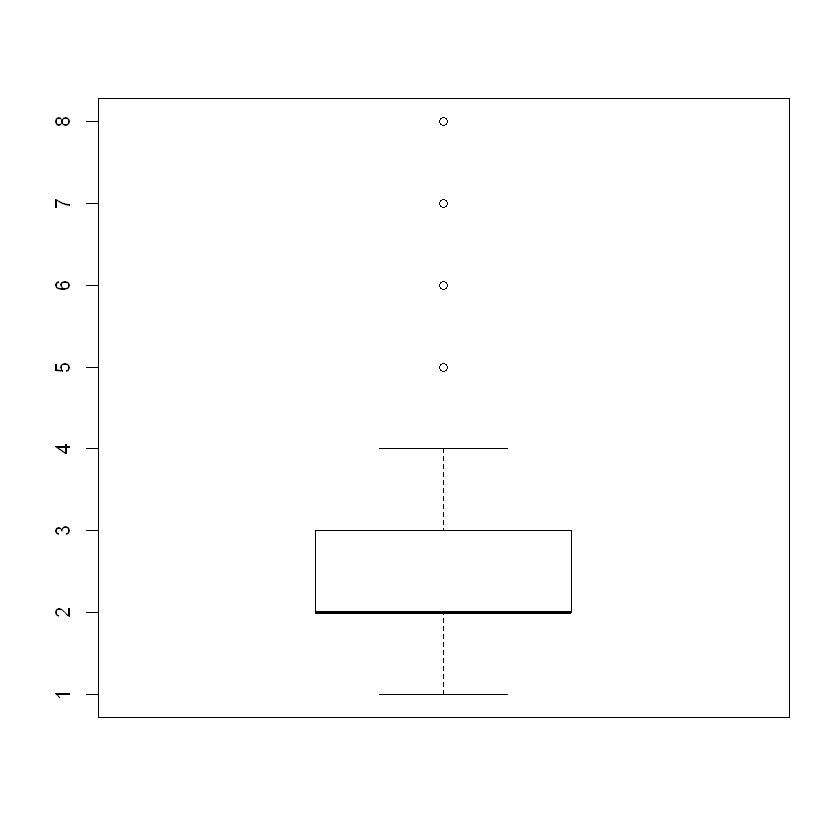

In [20]:
boxplot(russian$OperatingSystems)

there is presence of missing data in the operating systems feature. 

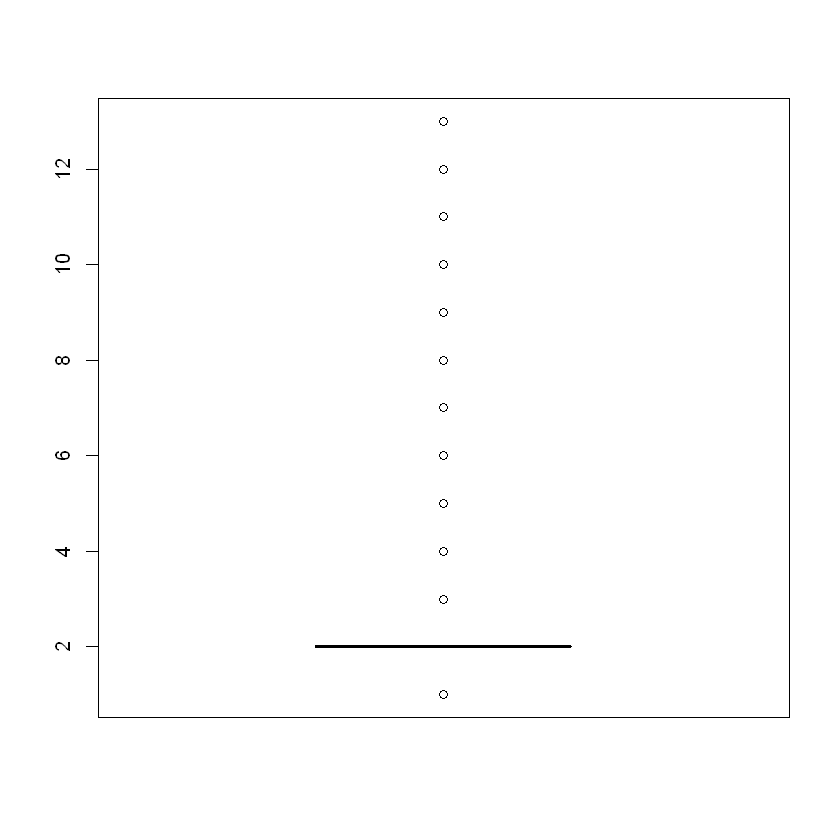

In [21]:
boxplot(russian$Browser)

there is presence of missing data in the browser feature. 

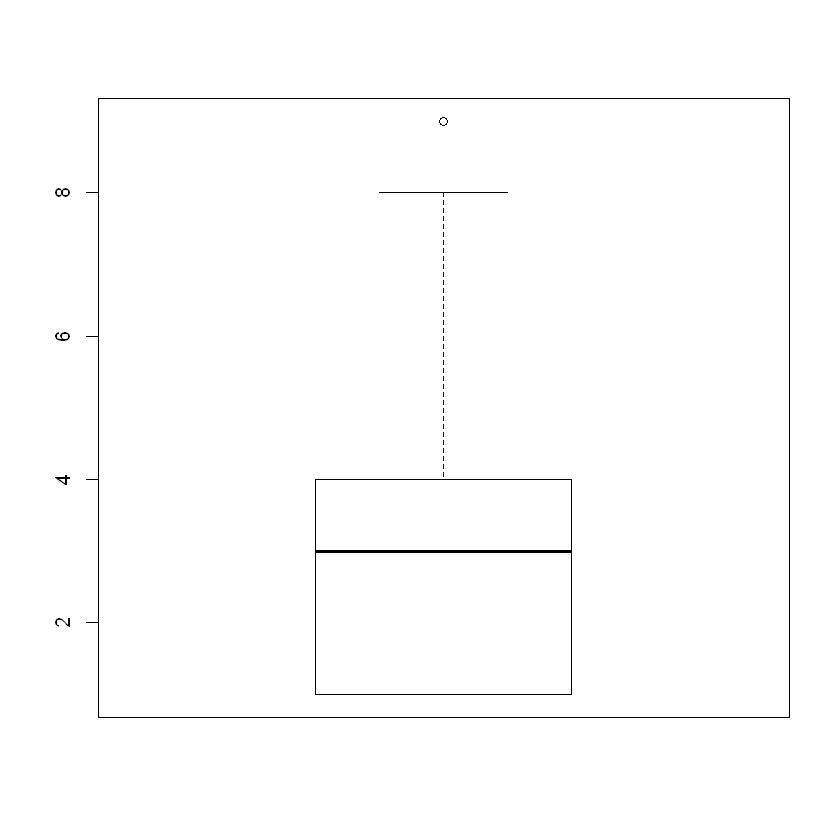

In [22]:
boxplot(russian$Region)

there is presence of missing data in the region feature. 

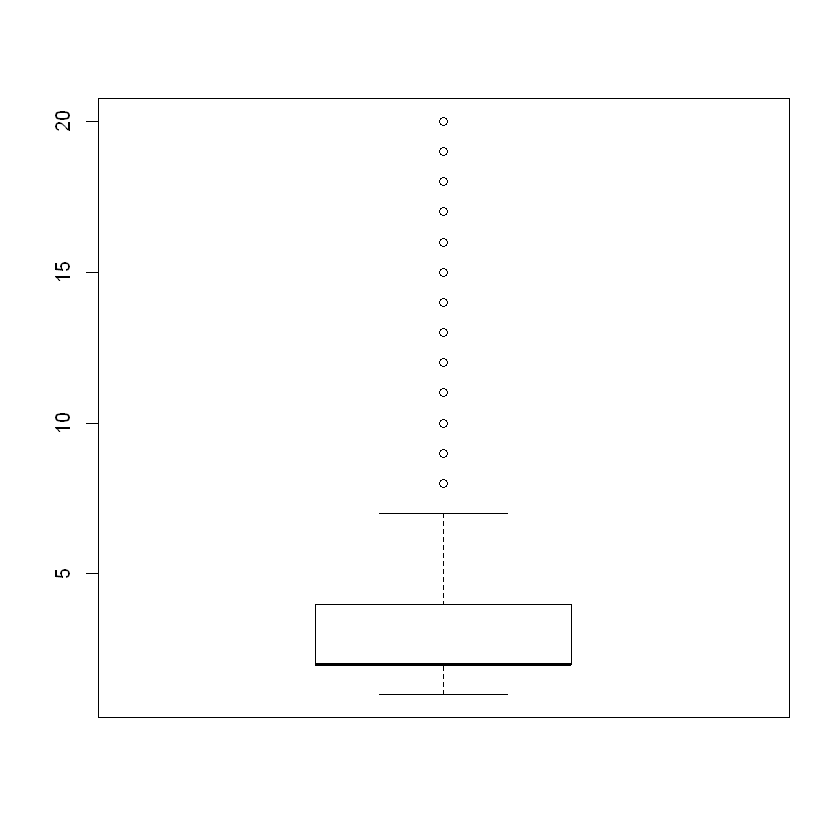

In [24]:
boxplot(russian$TrafficType)

there is presence of missing data in the traffic type feature.

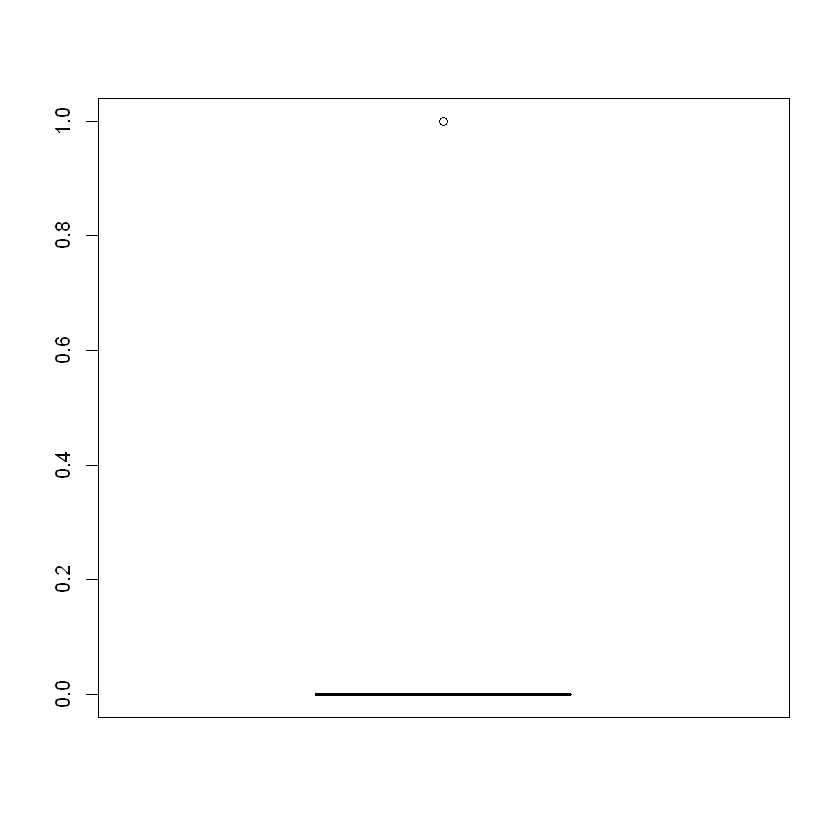

In [25]:
boxplot(russian$Weekend)

there is presence of missing data in the weekend feature. 

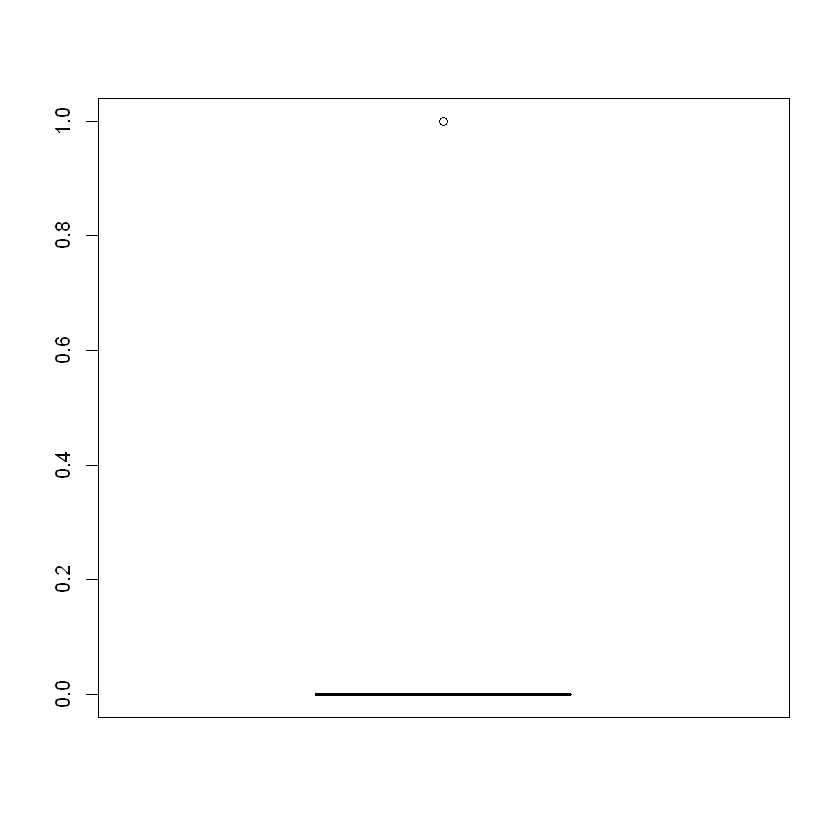

In [27]:
boxplot(russian$Revenue)

there is presence of missing data in the revenue feature. 

#  Dealing with Annomalies

In [28]:
# removing missing data
# we are going to use the mice package to make predictions on the missing values
install.packages("mice")
library(mice)
mice_mod <- mice(russian[, c("Administrative","Administrative_Duration","Informational","Informational_Duration","ProductRelated","ProductRelated_Duration","BounceRates","ExitRates" )], method='rf')
install.packages("mice")
mice_complete <- complete(mice_mod)

package 'mice' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\I\AppData\Local\Temp\RtmpiM7p37\downloaded_packages


Warning message:
"package 'mice' was built under R version 3.6.3"
Attaching package: 'mice'

The following objects are masked from 'package:base':

    cbind, rbind




 iter imp variable
  1   1  Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration  BounceRates  ExitRates
  1   2  Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration  BounceRates  ExitRates
  1   3  Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration  BounceRates  ExitRates
  1   4  Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration  BounceRates  ExitRates
  1   5  Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration  BounceRates  ExitRates
  2   1  Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration  BounceRates  ExitRates
  2   2  Administrative  Administrative_Duration  Informationa

Warning message:
"package 'mice' is in use and will not be installed"

In [29]:
# we now transfer the missing data values in the dataset
russian$Administrative <- mice_complete$Administrative
russian$Administrative_Duration <- mice_complete$Administrative_Duration
russian$Informational <- mice_complete$Informational
russian$Informational_Duration <- mice_complete$Informational_Duration
russian$ProductRelated <- mice_complete$ProductRelated
russian$ProductRelated_Duration <- mice_complete$ProductRelated_Duration
russian$BounceRates <- mice_complete$BounceRates
russian$ExitRates <- mice_complete$ExitRates

In [30]:
# we are now going to remove the duplicates that are in the datasets
library(dplyr)
russia <- russian
distinct(russian, .keep_all= TRUE)



Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0,0,1,0.000000,0.200000000,0.200000000,0.00000,0.0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0.0,0,0,2,64.000000,0.000000000,0.100000000,0.00000,0.0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1.0,0,-1,1,-1.000000,0.200000000,0.200000000,0.00000,0.0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0.0,0,0,2,2.666667,0.050000000,0.140000000,0.00000,0.0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0.0,0,0,10,627.500000,0.020000000,0.050000000,0.00000,0.0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0.0,0,0,19,154.216667,0.015789474,0.024561404,0.00000,0.0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE
0,-1.0,0,-1,1,-1.000000,0.200000000,0.200000000,0.00000,0.4,Feb,2,4,3,3,Returning_Visitor,FALSE,FALSE
1,-1.0,0,-1,1,-1.000000,0.200000000,0.200000000,0.00000,0.0,Feb,1,2,1,5,Returning_Visitor,TRUE,FALSE
0,0.0,0,0,2,37.000000,0.000000000,0.100000000,0.00000,0.8,Feb,2,2,2,3,Returning_Visitor,FALSE,FALSE
0,0.0,0,0,3,738.000000,0.000000000,0.022222222,0.00000,0.4,Feb,2,4,1,2,Returning_Visitor,FALSE,FALSE


In [34]:
a <- russian[duplicated(russian),]
a

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
159,0,0,0,0,1,0,0.2,0.2,0,0,Feb,1,1,1,3,Returning_Visitor,FALSE,FALSE
179,0,0,0,0,1,0,0.2,0.2,0,0,Feb,3,2,3,3,Returning_Visitor,FALSE,FALSE
419,0,0,0,0,1,0,0.2,0.2,0,0,Mar,1,1,1,1,Returning_Visitor,TRUE,FALSE
457,0,0,0,0,1,0,0.2,0.2,0,0,Mar,2,2,4,1,Returning_Visitor,FALSE,FALSE
484,0,0,0,0,1,0,0.2,0.2,0,0,Mar,3,2,3,1,Returning_Visitor,FALSE,FALSE
513,0,0,0,0,1,0,0.2,0.2,0,0,Mar,2,2,1,1,Returning_Visitor,FALSE,FALSE
555,0,0,0,0,1,0,0.2,0.2,0,0,Mar,2,2,1,1,Returning_Visitor,FALSE,FALSE
590,0,0,0,0,1,0,0.2,0.2,0,0,Mar,2,2,1,1,Returning_Visitor,FALSE,FALSE
660,0,0,0,0,2,0,0.2,0.2,0,0,Mar,2,5,1,1,Returning_Visitor,FALSE,FALSE
775,0,0,0,0,1,0,0.2,0.2,0,0,Mar,2,2,4,1,Returning_Visitor,FALSE,FALSE


the are no absolute reason that we should remove the outliers because they seem valid

In [35]:
# Standardising the column names
names(russian)[names(russian) == "Administrative"] <- "administrative"
names(russian)[names(russian) == "Administrative_Duration"] <- "administrative_duration"
names(russian)[names(russian) == "Informational"] <- "informational"
names(russian)[names(russian) == "Informational_Duration"] <- "informational_duration"
names(russian)[names(russian) == "ProductRelated"] <- "product_related"
names(russian)[names(russian) == "ProductRelated_Duration"] <- "product_related_duration"
names(russian)[names(russian) == "BounceRates"] <- "bounce_rates"
names(russian)[names(russian) == "ExitRates"] <- "exit_rates"
names(russian)[names(russian) == "PageValues"] <- "page_values"
names(russian)[names(russian) == "SpecialDay"] <- "special_day"
names(russian)[names(russian) == "Month"] <- "month"
names(russian)[names(russian) == "Operatingsystems"] <- "operating_systems"
names(russian)[names(russian) == "Browser"] <- "browser"
names(russian)[names(russian) == "Region"] <- "region"
names(russian)[names(russian) == "TrafficType"] <- "traffic_type"
names(russian)[names(russian) == "VisitorType"] <- "visitor_type"
names(russian)[names(russian) == "Weekend"] <- "weekend"
names(russian)[names(russian) == "Revenue"] <- "revenue"

In [36]:
# converting the revenue column to a factor since it our label
b = c('revenue')
for (i in b) {
russian[,i] = as.factor(russian[,i])
}

# Univariate Analysis

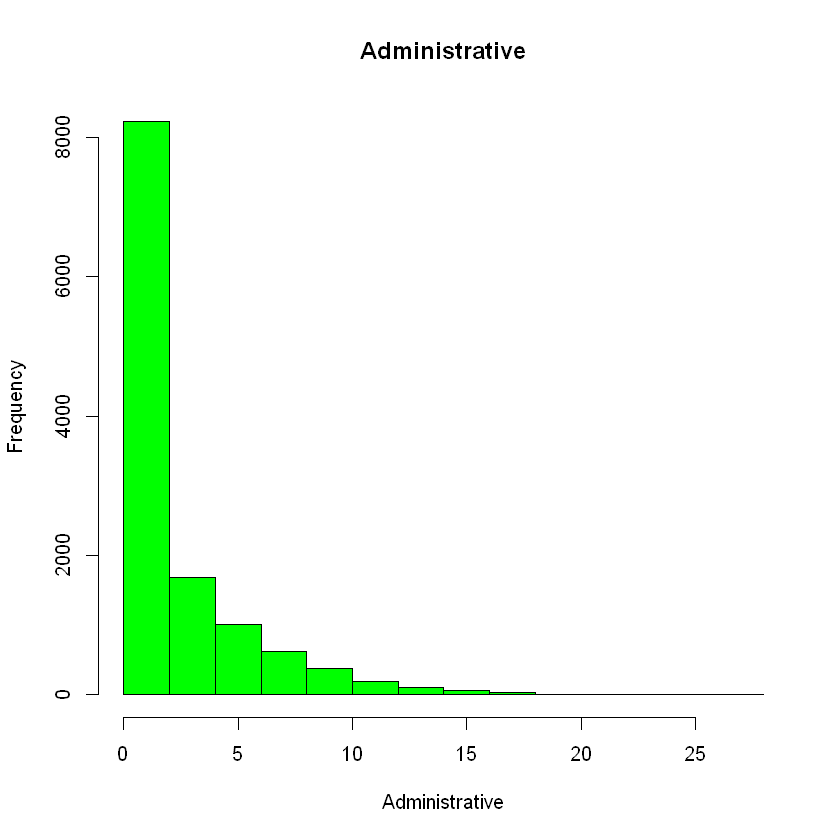

In [37]:
hist(russian$administrative,
main="Administrative",
xlab = "Administrative",
col='green')

data is skewed to the right and most of the data is skewed between 0 and 5 

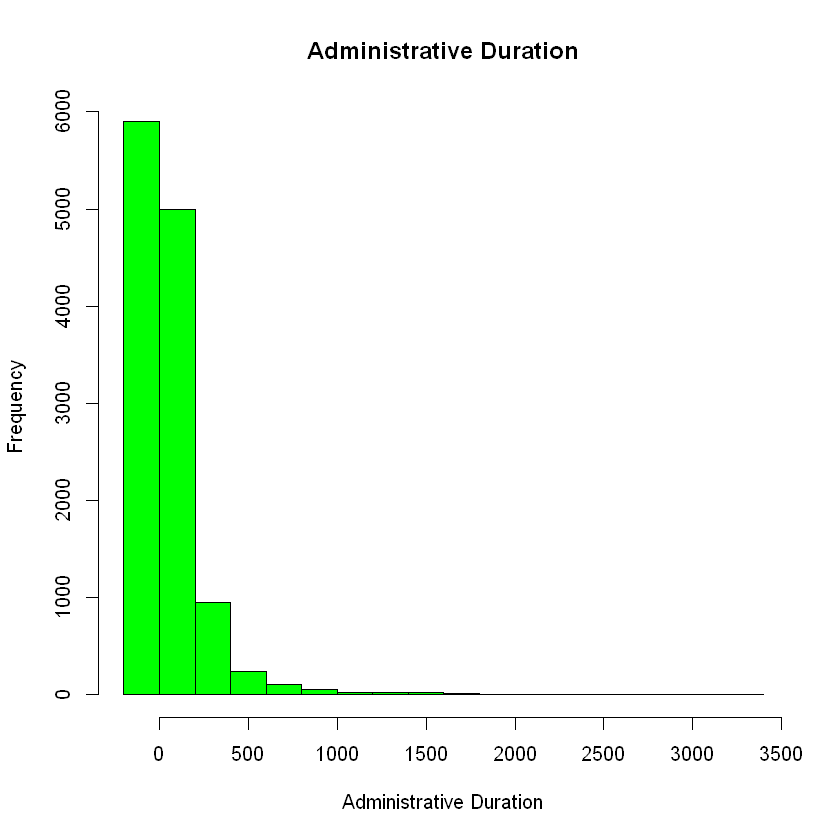

In [38]:
hist(russian$administrative_duration,
main= "Administrative Duration",
xlab= "Administrative Duration",
col= "green")

data is skewed to the right and most of the data is skewed between 0 and 250 

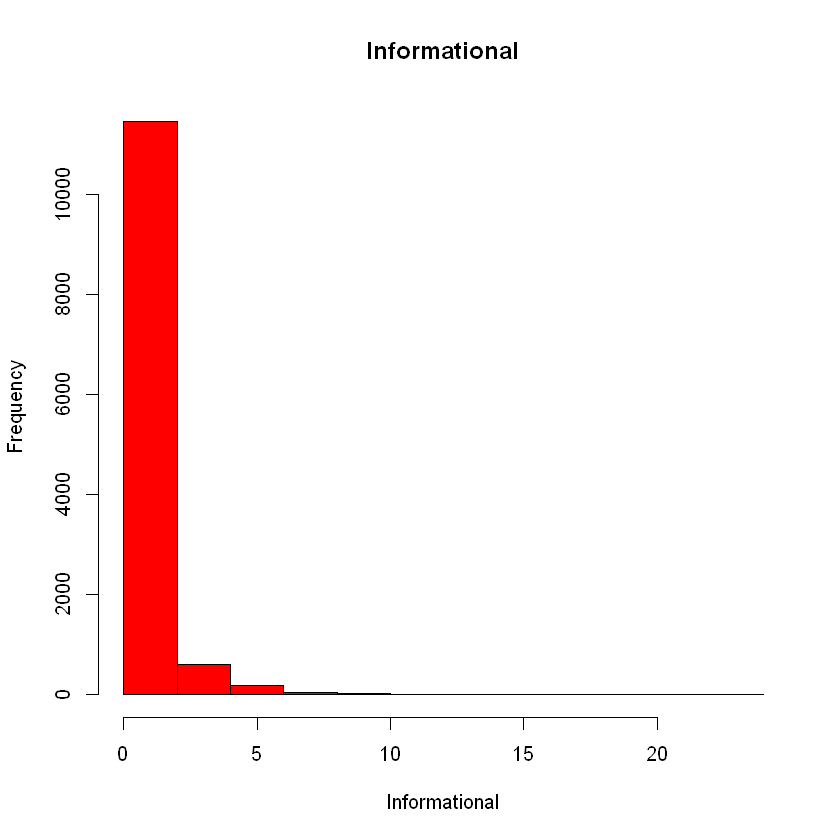

In [39]:
hist(russian$informational,
main =  "Informational",
xlab = "Informational",
col = "red")

data is skewed to the right and most of the data is skewed between 0 and 3

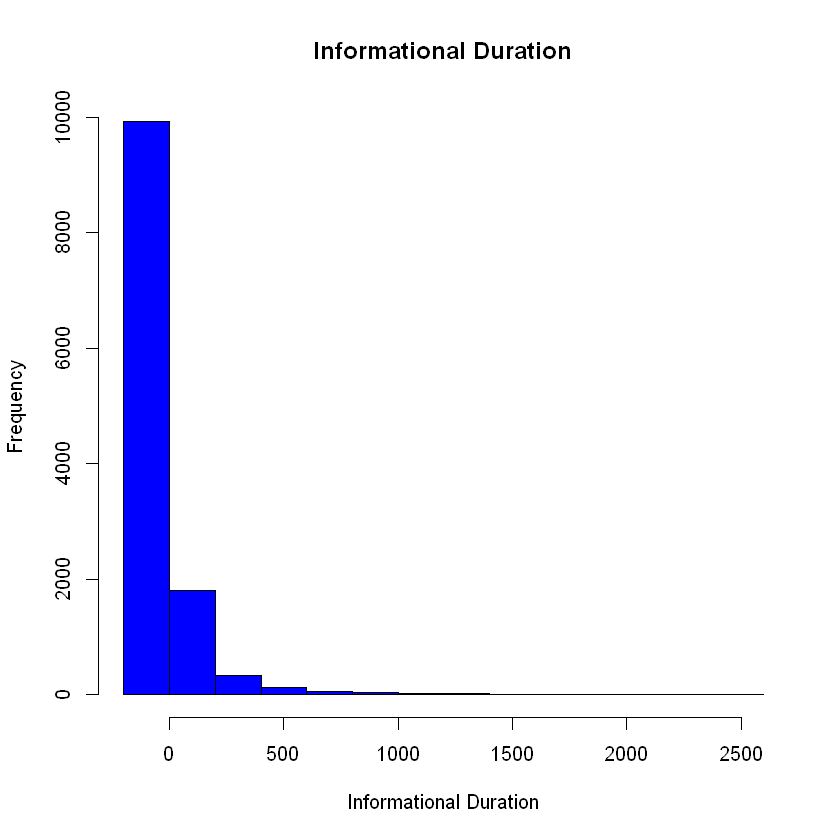

In [40]:
hist(russian$informational_duration,
main = "Informational Duration",
xlab= "Informational Duration",
col = "blue")

data is skewed to the right and most of the data is skewed between 0 and 250

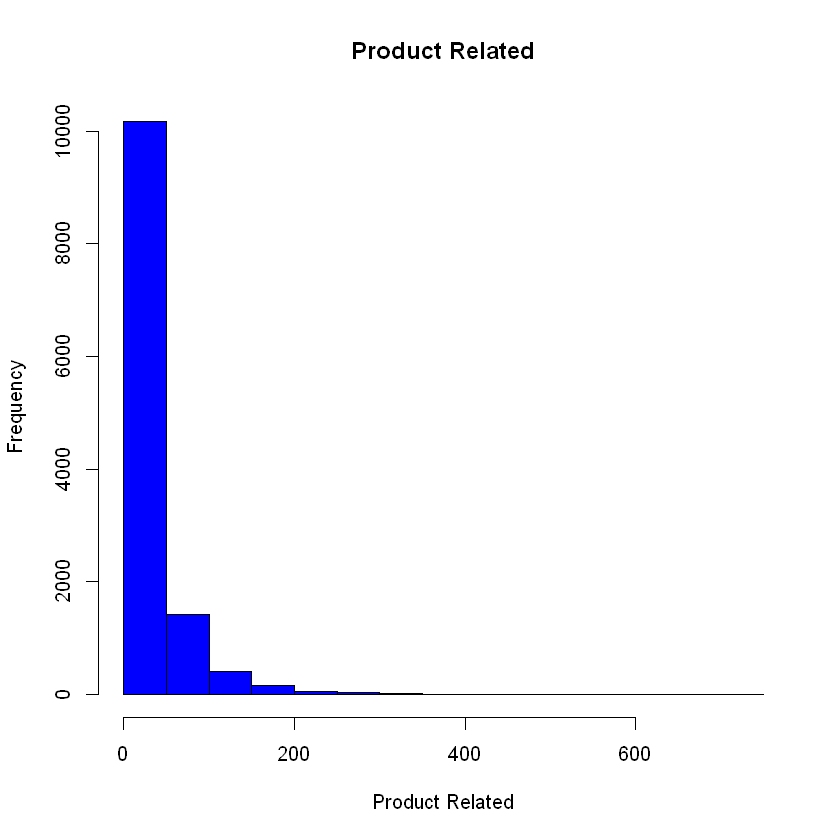

In [41]:
hist(russian$product_related,
main = "Product Related",
xlab = "Product Related",
col = "blue")

data is skewed to the right and most of the data is skewed between 0 and 100

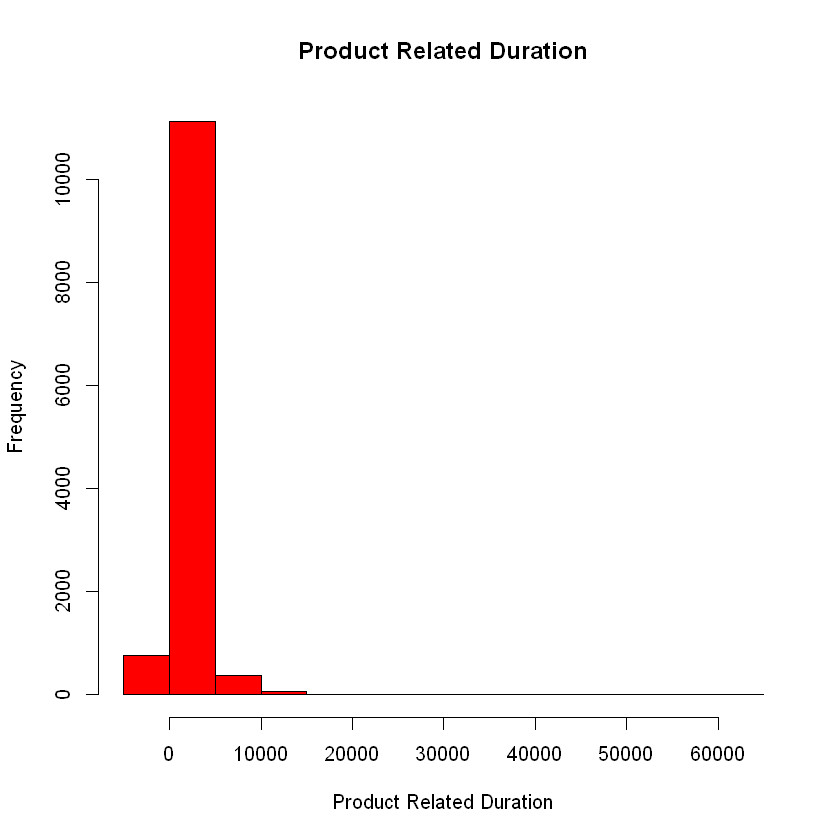

In [42]:
hist(russian$product_related_duration,
main = "Product Related Duration",
xlab = "Product Related Duration",
col = "red")

data is skewed to the right and most of the data is skewed between 0 and 10,000

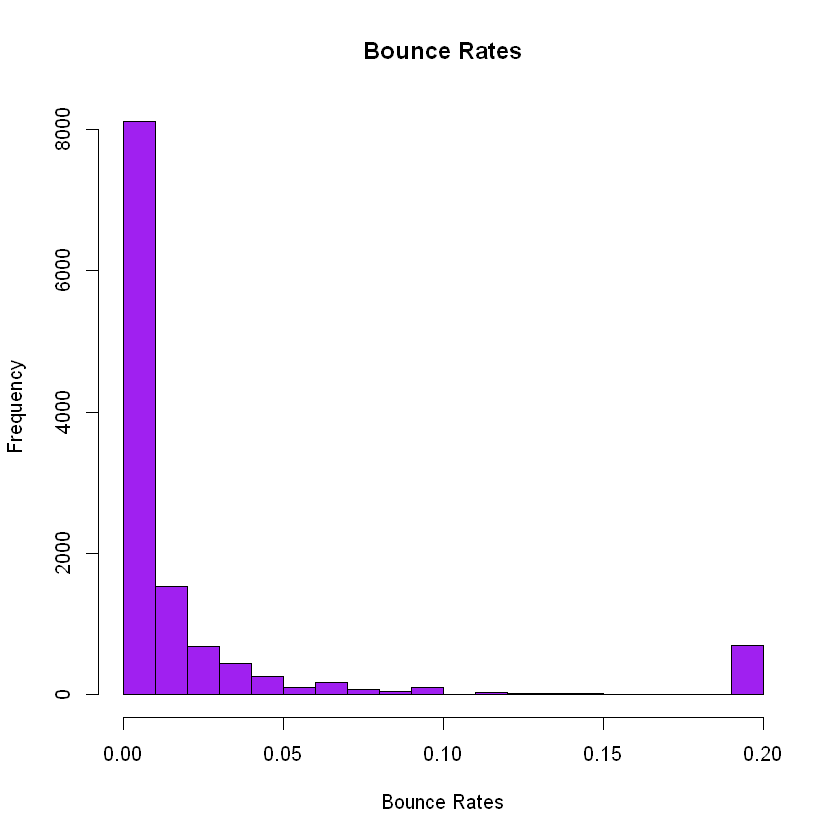

In [43]:
hist(russian$bounce_rates,
main = "Bounce Rates",
xlab = "Bounce Rates",
col = "purple")

data is skewed to the right and most of the data is skewed between 0 and 0.02

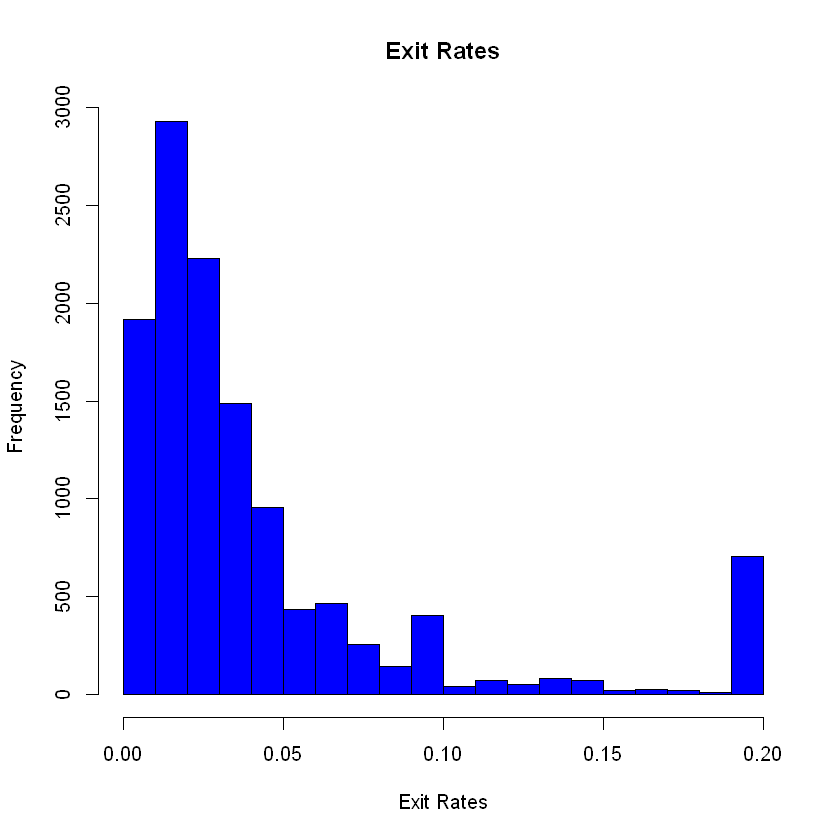

In [44]:
hist(russian$exit_rates,
main = "Exit Rates",
xlab = "Exit Rates",
col = "blue")

data is skewed to the right and most of the data is skewed between 0 and 0.05

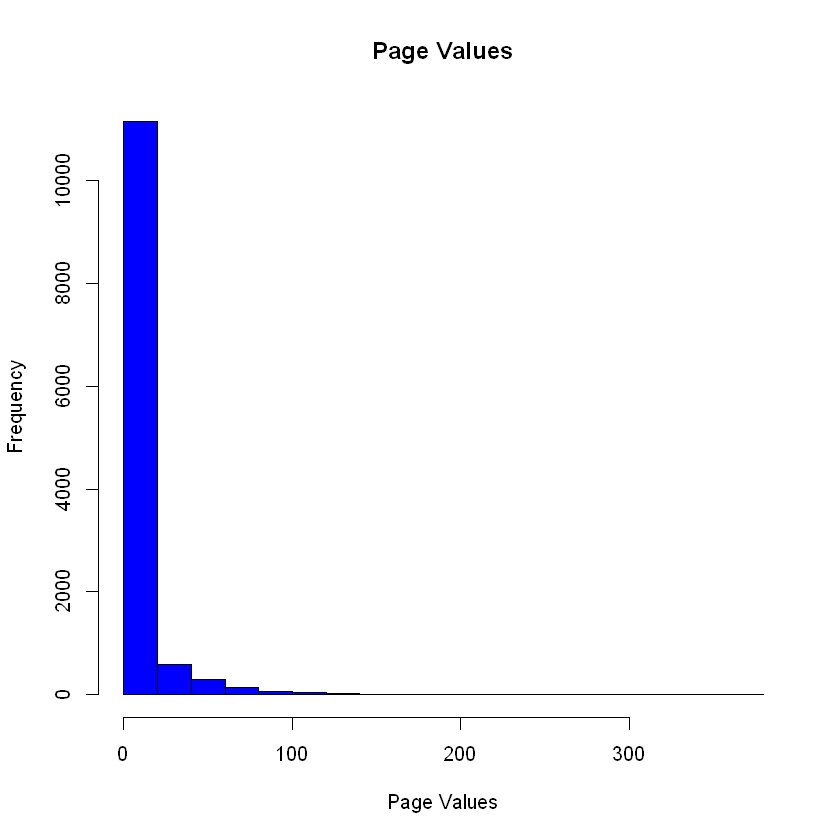

In [45]:
hist(russian$page_values,
main = "Page Values",
xlab = "Page Values",
col = "blue")

data is skewed to the right and most of the data is skewed between 0 and 25

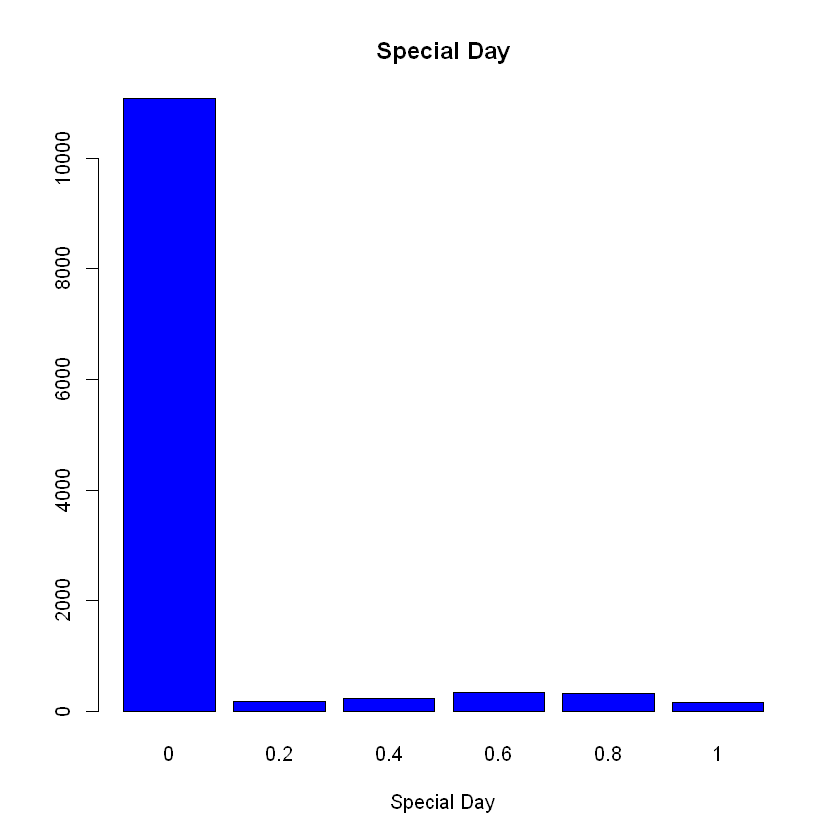

In [46]:
barplot(table(russian$special_day),
main = "Special Day",
xlab = "Special Day",
col = "blue")

the special day of 0 has the most visits

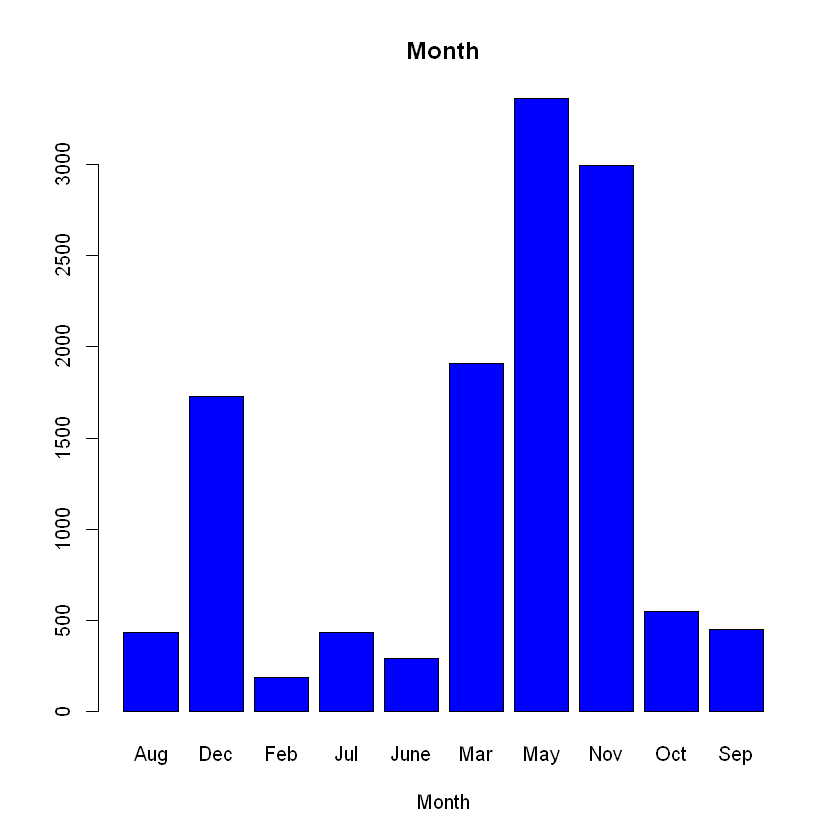

In [48]:
barplot(table(russian$month),
main = "Month",
xlab = "Month",
col = "blue")

the month of May had most visits

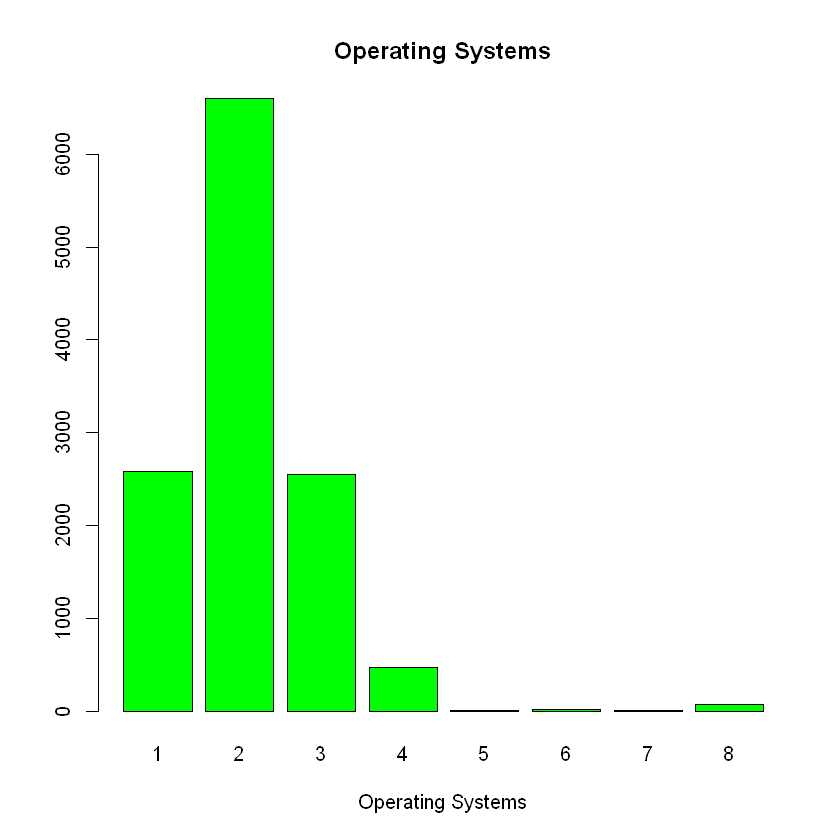

In [49]:
barplot(table(russian$OperatingSystems),
main = "Operating Systems",
xlab = "Operating Systems",
col = "green")

operating systems 2 is the most used to access the website

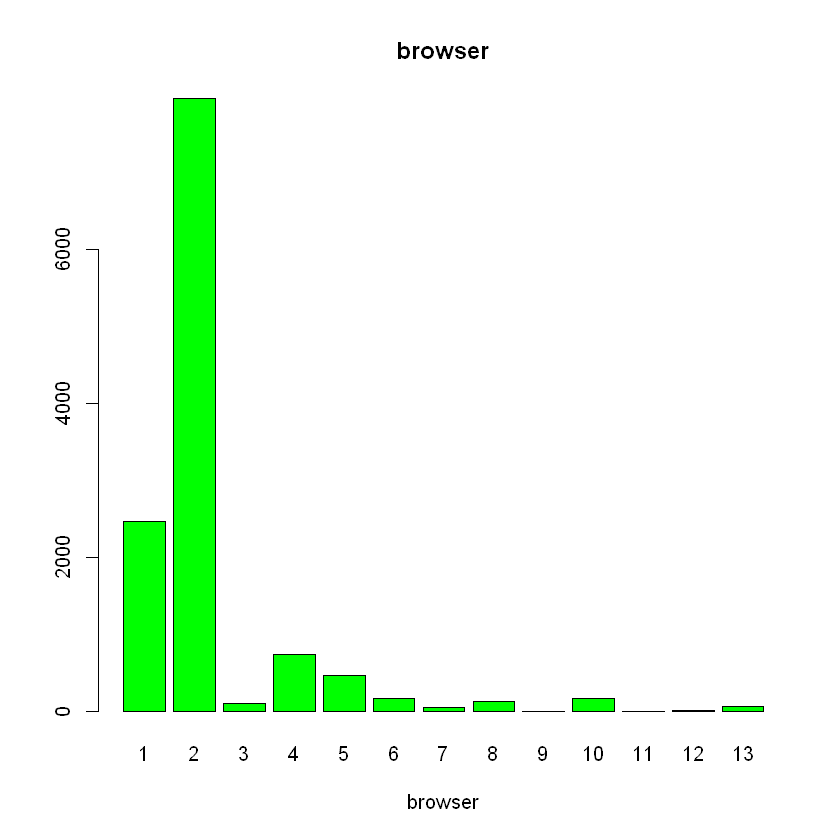

In [50]:
barplot(table(russian$browser),
main = "browser",
xlab = "browser",
col = "green")

browser 2 is the most used to access the website

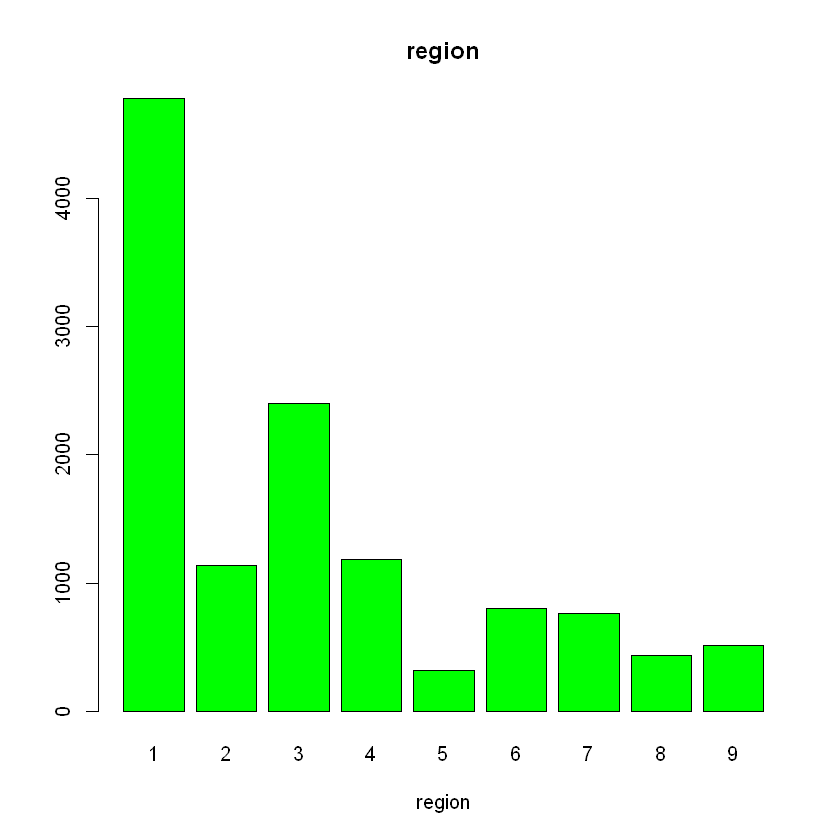

In [52]:
barplot(table(russian$region),
main = "region",
xlab = "region",
col = "green")

region 1 has the most number of people visiting the system

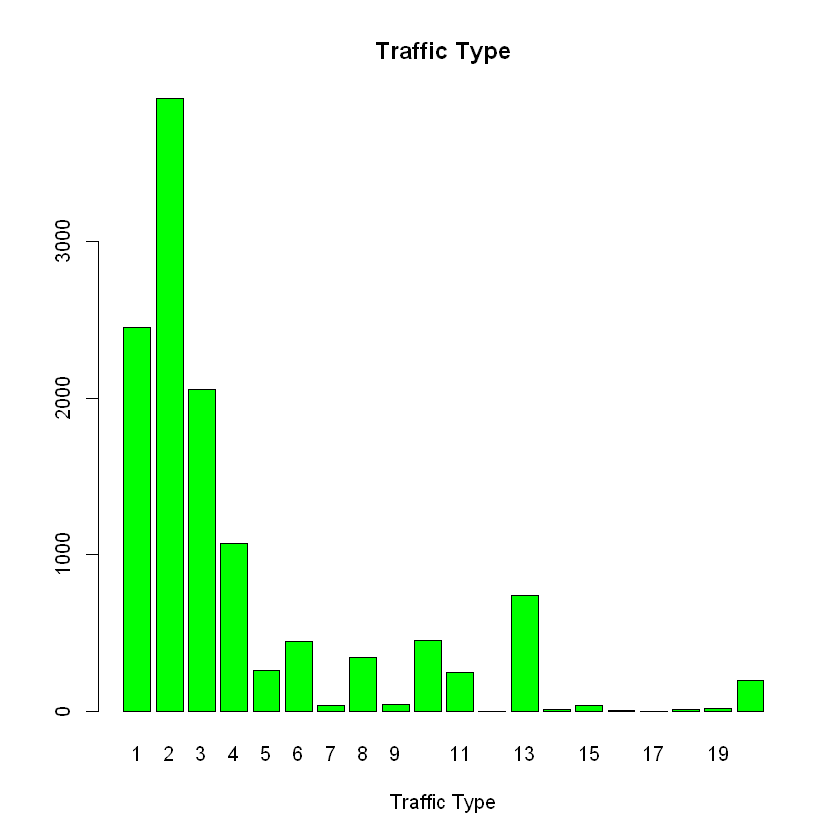

In [53]:
barplot(table(russian$traffic_type),
main = "Traffic Type",
xlab = "Traffic Type",
col = "green")

traffic type 2 is has the most visits

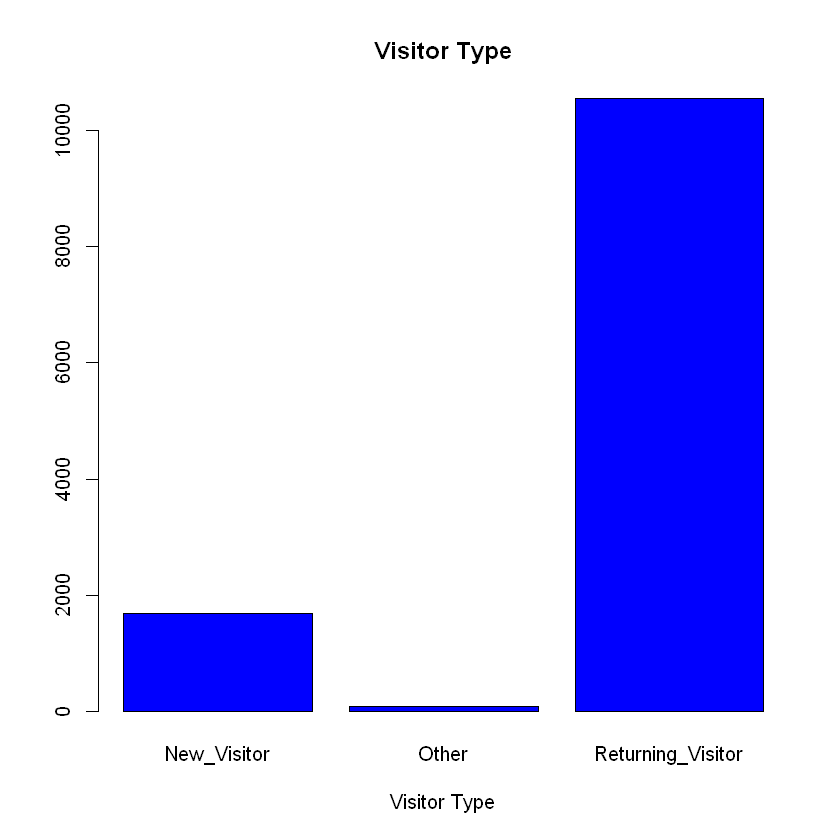

In [54]:
barplot(table(russian$visitor_type),
main = "Visitor Type",
xlab = "Visitor Type",
col = "blue")

returning visitorsare the most frequent visitors of the website

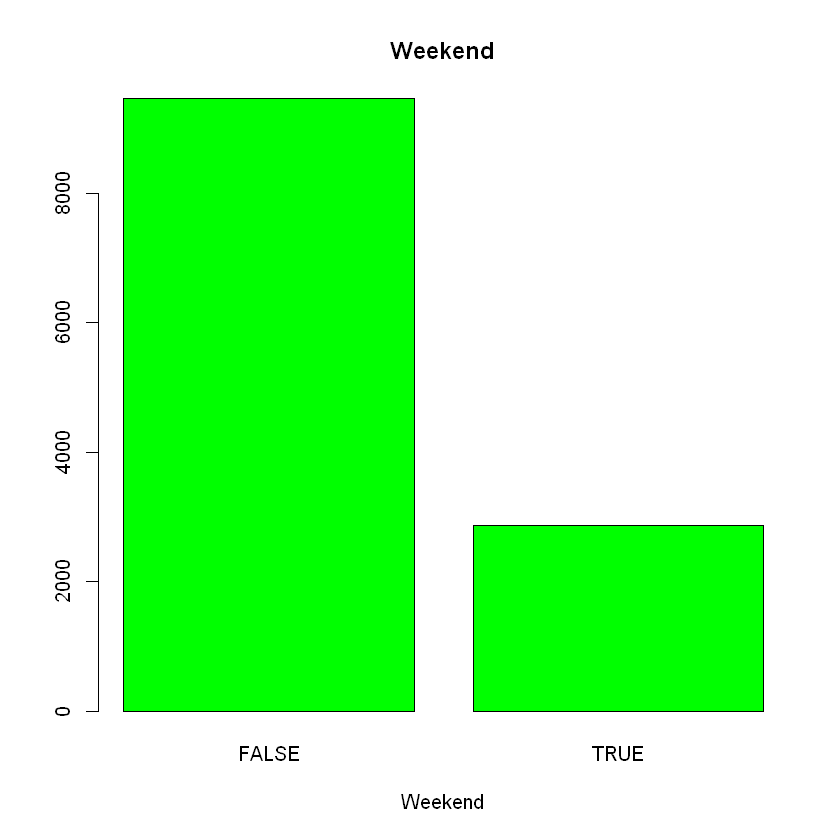

In [55]:
barplot(table(russian$weekend),
main = "Weekend",
xlab = "Weekend",
col = "green")

most visit are done during the weekdays

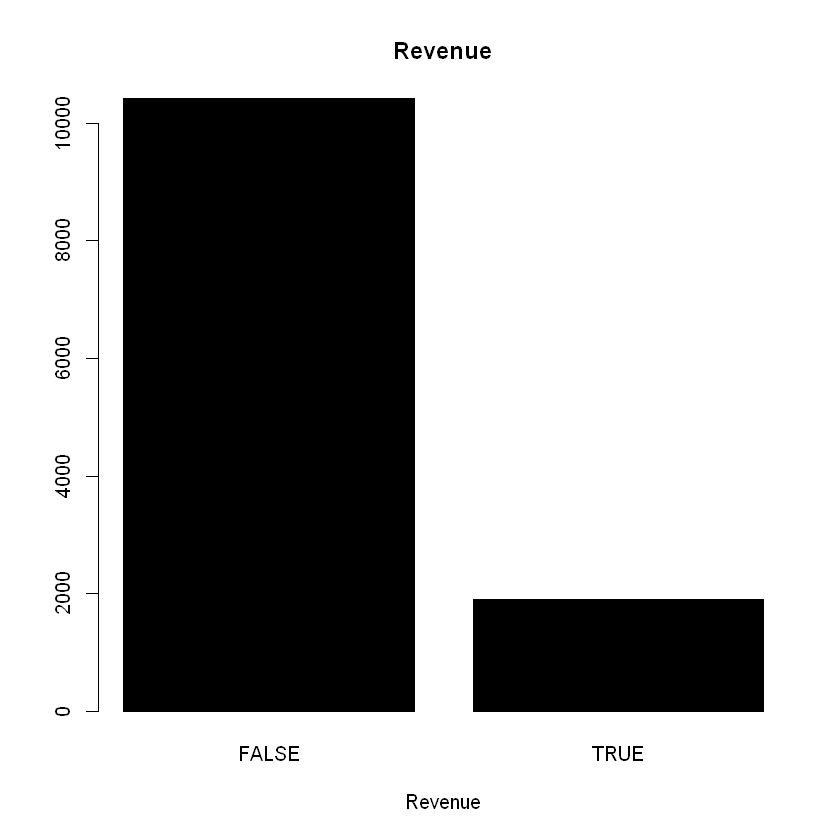

In [56]:
barplot(table(russian$revenue),
main = "Revenue",
xlab = "Revenue",
col = "black")

revenue collected by the company is less compared to the one that is not collected

# Bivariate Analysis

In [57]:
# we are going to import the library that is responsible for visualisations
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


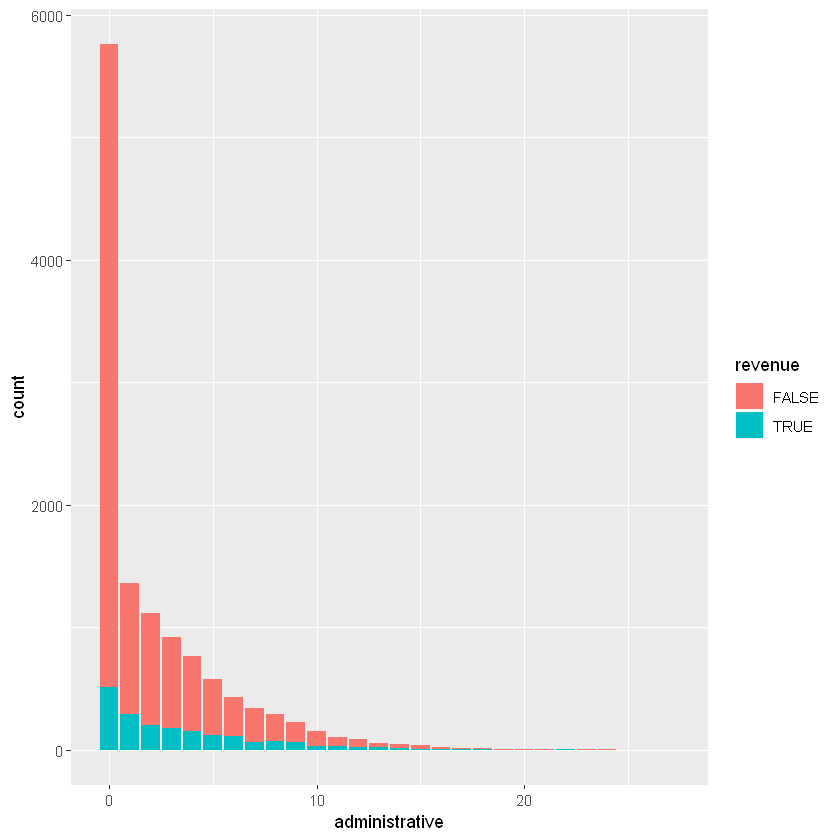

In [59]:
# administrative ve revenue
admin =ggplot(data=russian, aes(x=administrative, fill= revenue)) + geom_bar()
admin

generally, there is less revenue collected from the administrative page

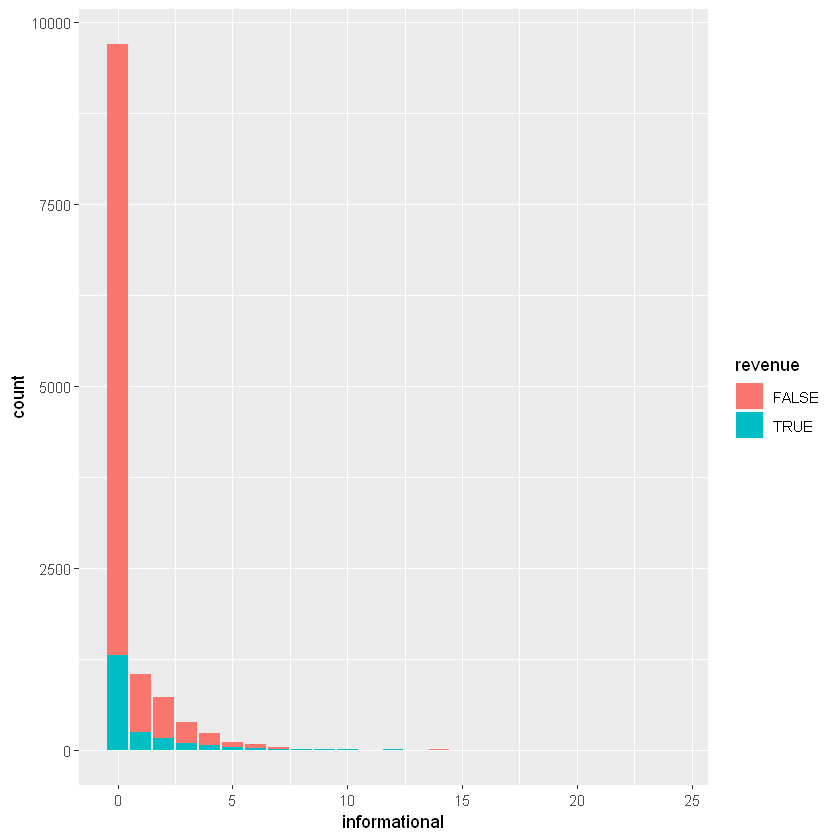

In [60]:
# informational vs revenue
info = ggplot(data = russian, aes(x = informational, fill= revenue)) + geom_bar()
info

generally, there is less revenue collected from the informational page

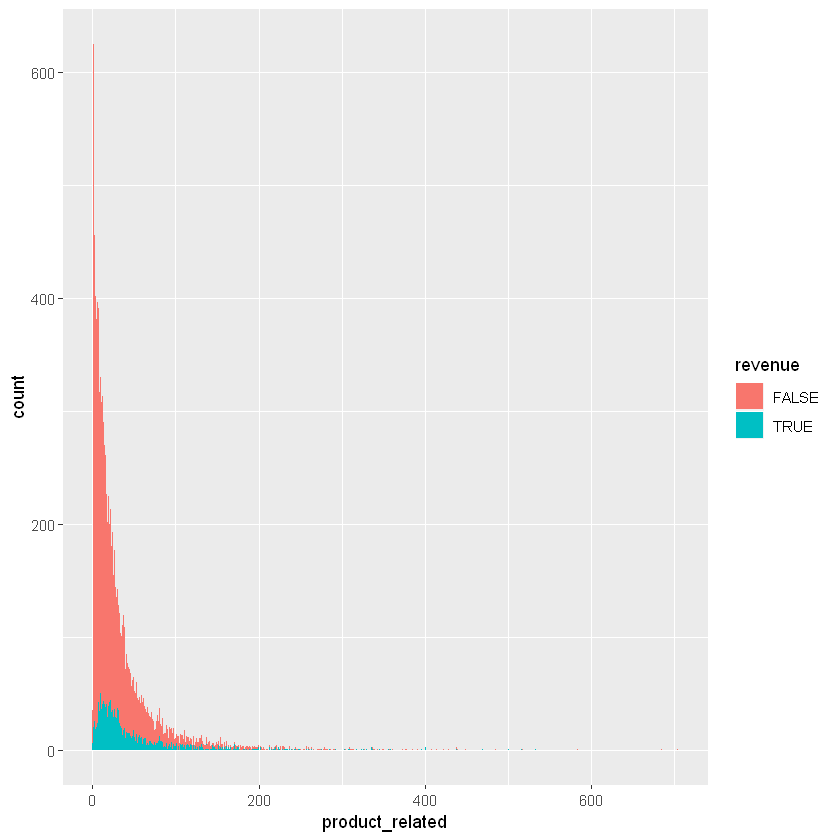

In [62]:
# Product related vs revenue
product = ggplot(data = russian, aes(x = product_related, fill= revenue)) + geom_bar()
product

generally, there is less revenue collected from the product related page

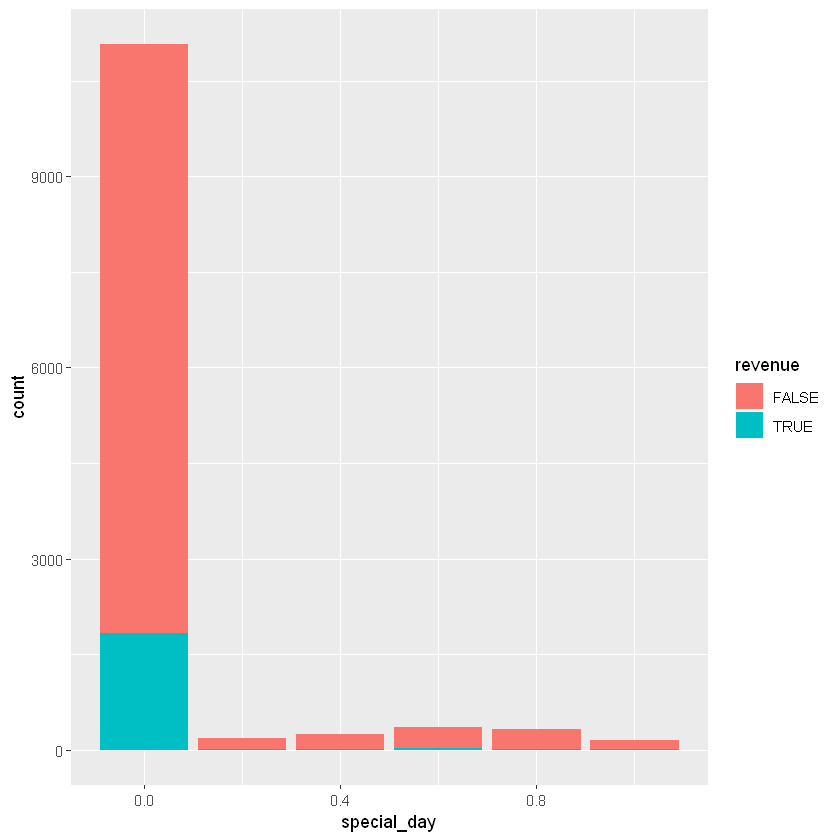

In [63]:
# Special day vs revenue
special = ggplot(data = russian, aes(x = special_day, fill= revenue)) + geom_bar()
special

Generally, there is less revenue collected in the special days

Most of the revenue is collected during the special day of 0

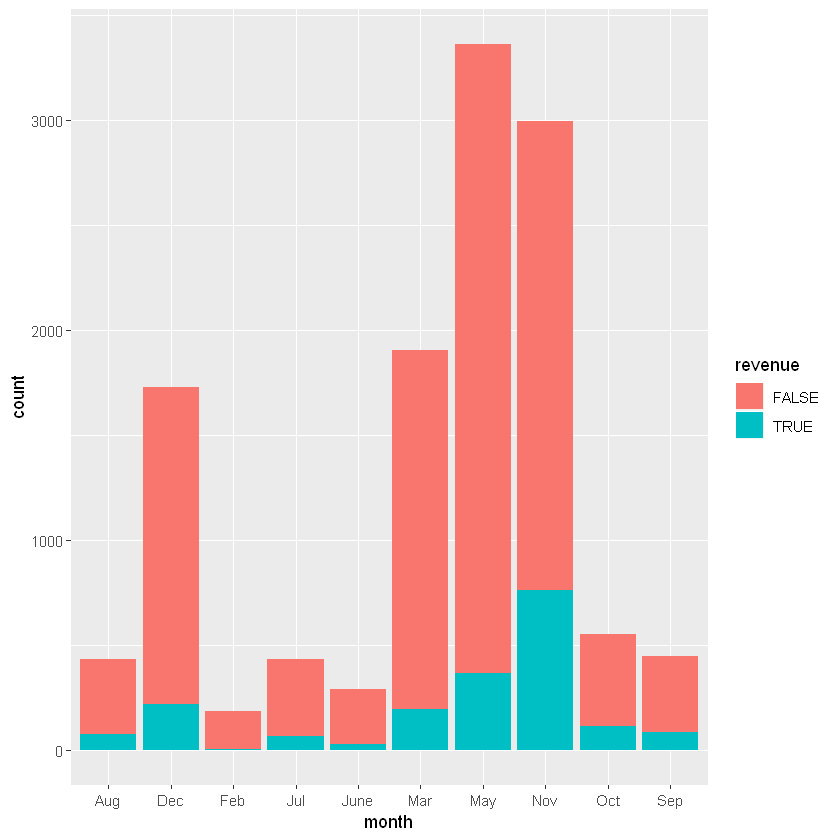

In [64]:
# Month vs revenue
product = ggplot(data = russian, aes(x = month, fill= revenue)) + geom_bar()
product

generally, there is less revenue collected through out the year
November made a lot revenue

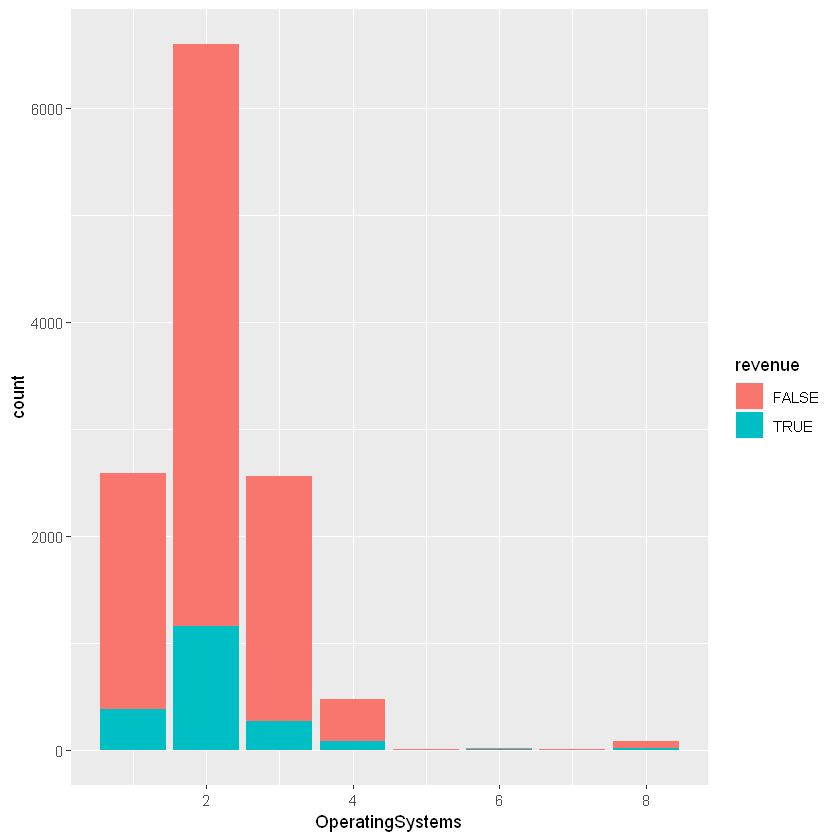

In [65]:
# Operating system vs revenue
product = ggplot(data = russian, aes(x = OperatingSystems, fill= revenue)) + geom_bar()
product

operating system 2 helps the brand to generate revenue  

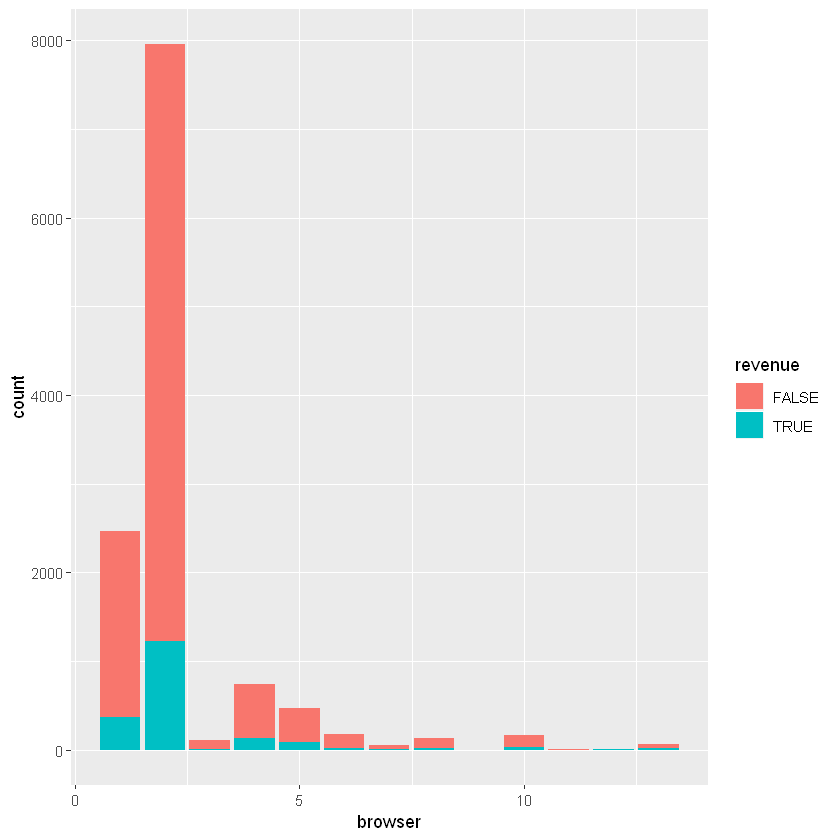

In [66]:
# Browser vs revenue
product = ggplot(data = russian, aes(x = browser, fill= revenue)) + geom_bar()
product

browser 2 helps the brand to generate a lot of revenue

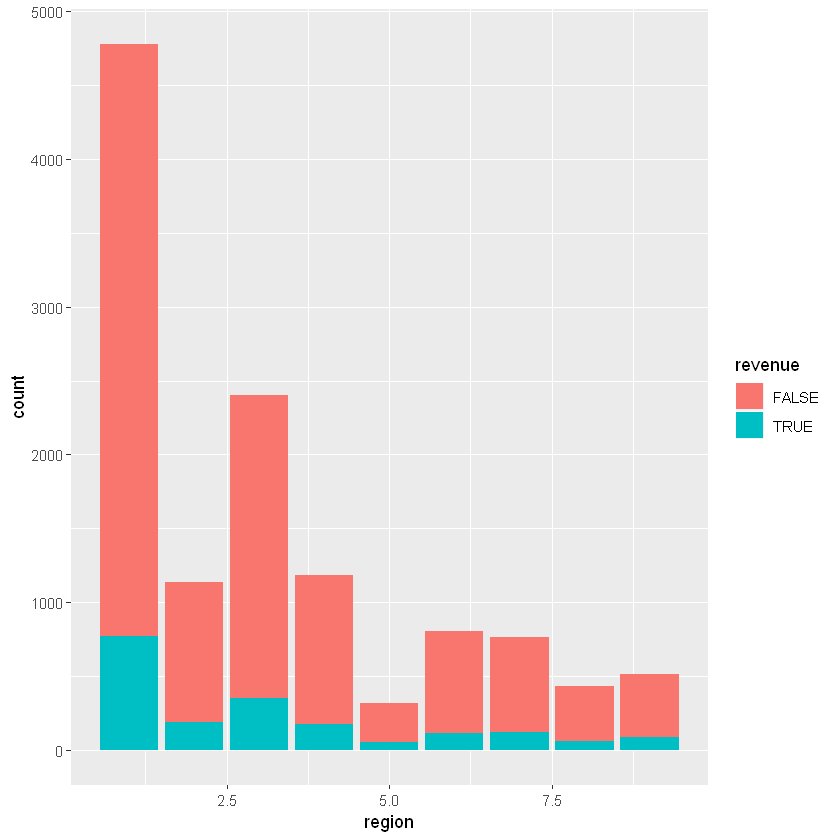

In [67]:
# Region vs revenue
product = ggplot(data = russian, aes(x = region, fill= revenue)) + geom_bar()
product

A lot of revenue is collected from region 1

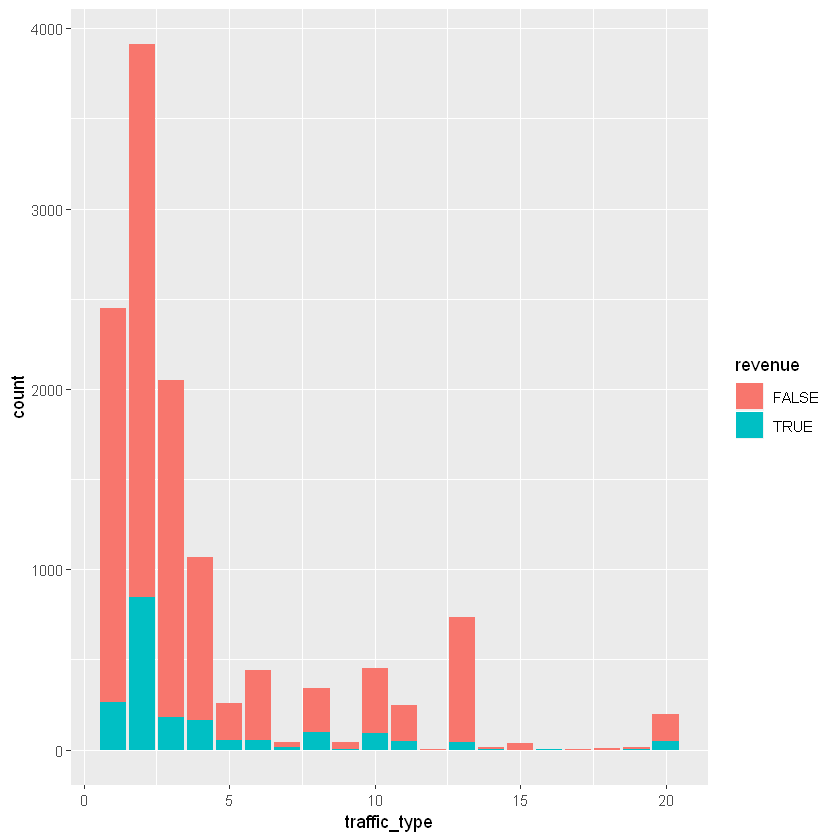

In [68]:
# Traffic type vs revenue
product = ggplot(data = russian, aes(x = traffic_type, fill= revenue)) + geom_bar()
product

the second type of traffic helps the brand generate a lot of revenue

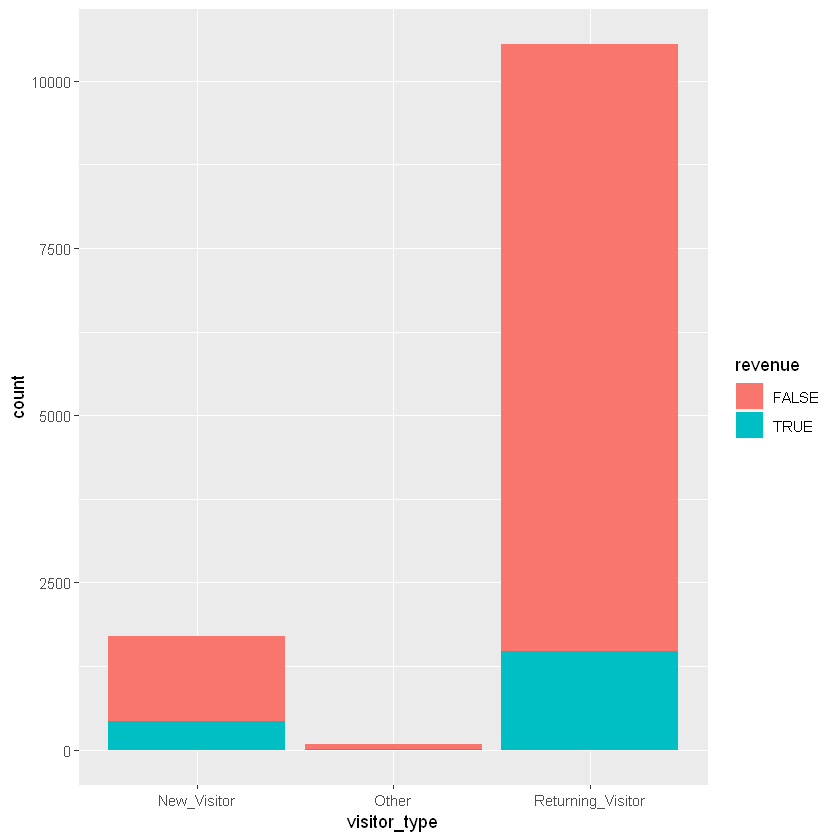

In [69]:
# Visitor type vs revenue
product = ggplot(data = russian, aes(x = visitor_type, fill= revenue)) + geom_bar()
product

returning visitors are the ones who are making the brand generate a lot of revenue compared to other types of visitors

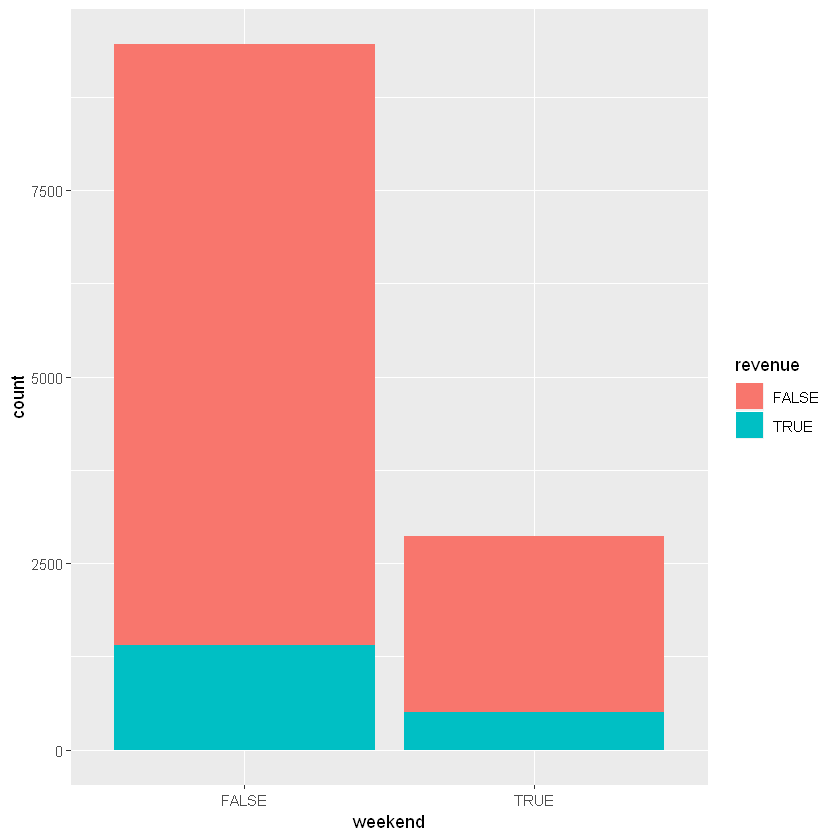

In [70]:
# Weekend vs revenue
product = ggplot(data = russian, aes(x = weekend, fill= revenue)) + geom_bar()
product

Most of the revenue is generated during the weekdays

# Modelling

## K-Means

In [71]:
# Preprocessing the data
# for clustering is a form of unsupervised learning,
# we are going to remove the dependent variable and assign it a separate variable from the independent variables.
# then, we shall normalise the independent variable.
russian.new <- russian[, c(1,2,3,4,5,6,7,8,9,10,12,13,14,15,17)]
russian.class <- russian[, "revenue"]
head(russian.new)

administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,special_day,OperatingSystems,browser,region,traffic_type,weekend
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,1,1,1,1,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,2,2,1,2,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,4,1,9,3,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,3,2,2,4,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,3,3,1,4,TRUE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,2,2,1,3,FALSE


In [72]:
# previewing the dependent variable
head(russian.class)

[1] FALSE FALSE FALSE FALSE FALSE FALSE
Levels: FALSE TRUE

In [73]:
# converting categorical data to numerical data
a = c('month', 'visitor_type', "weekend")
for (i in a) {
russian[,i] = as.factor(russian[,i])
}

In [74]:
# normalizing the dataset so as no particular attribute has more impact than another
normalize <- function(x){
return ((x-min(x)) / (max(x)-min(x)))
}
russian.new$administrative <- normalize(russian.new$administrative)
russian.new$administrative_duration <- normalize(russian.new$administrative_duration)
russian.new$informational <- normalize(russian.new$informational)
russian.new$informational_duration <- normalize(russian.new$informational_duration)
russian.new$product_related <- normalize(russian.new$product_related)
russian.new$product_related_duration <- normalize(russian.new$product_related_duration)
russian.new$bounce_rates <- normalize(russian.new$bounce_rates)
russian.new$exit_rates <- normalize(russian.new$exit_rates)
russian.new$page_values <- normalize(russian.new$page_values)
russian.new$special_day <- normalize(russian.new$special_day)
#russian.new$month <- normalize(russian.new$month)
russian.new$OperatingSystems <- normalize(russian.new$OperatingSystems)
russian.new$browser <- normalize(russian.new$browser)
russian.new$region <- normalize(russian.new$browser)
russian.new$traffic_type <- normalize(russian.new$traffic_type)
#russian.new$visitor_type <- normalize(russian.new$visitor_type)
russian.new$weekend <- normalize(russian.new$weekend)

In [75]:
# Applying the K-means clustering algorithm with no. of centroids(k)=2
result <- kmeans(na.omit(russian.new),2)

In [76]:
# Previewing the no. of records in each cluster
result$size

[1]  1022 11308

In [77]:
# Getting the value of the cluster center
result$centers

administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,special_day,OperatingSystems,browser,region,traffic_type,weekend
0.001775748,0.00073861,0.0006523157,0.0004155791,0.004283077,0.0009058543,0.84365533,0.9081912,0.00000000,0.10782779,0.1682975,0.1099967,0.1099967,0.2123803,0.1497065
0.093362287,0.02617450,0.0228120210,0.0151259676,0.048748391,0.0203148122,0.04441772,0.1522498,0.01775059,0.05723382,0.1598742,0.1133711,0.1133711,0.1569639,0.2400955


In [78]:
# Getting the cluster vector that shows the cluster where each record falls
dim(result$cluster)

NULL

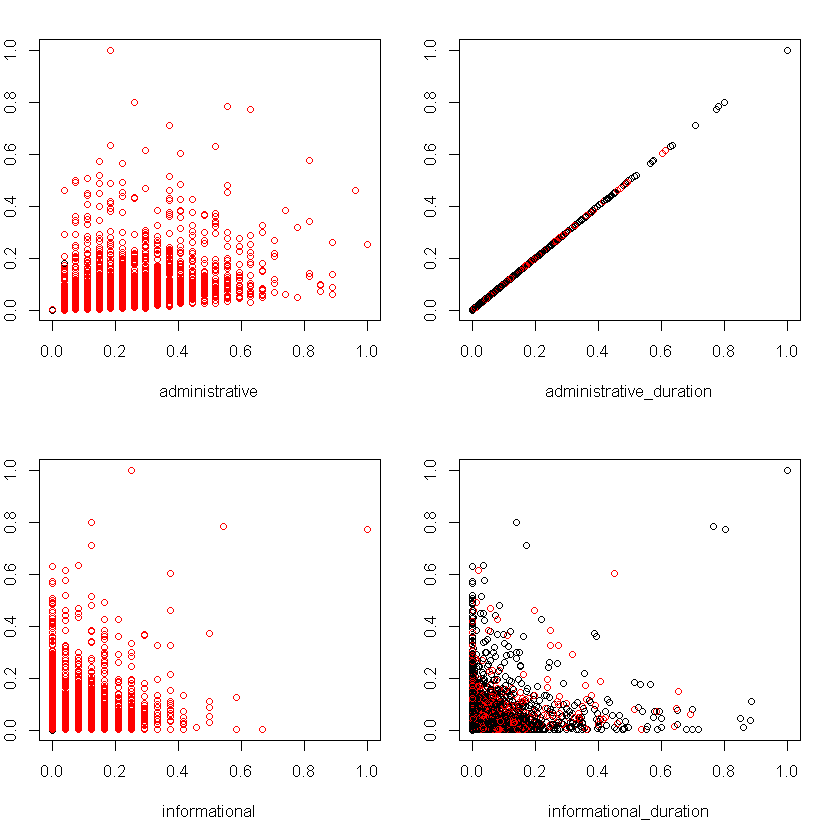

In [79]:
# visualising the clustering results
par(mfrow = c(2,2), mar = c(5,2,2,2))
plot(russian.new[c(1,2)], col = result$cluster)

# Plotting to see how Sepal.Length and Sepal.Width data points have been distributed
# originally as per "class" attribute in dataset
# ---
#
plot(russian.new[c(2,2)], col = russian.class)
plot(russian.new[c(3,2)], col = result$cluster)
plot(russian.new[c(4,2)], col = russian.class)

In [80]:
table(result$cluster, russian.class)

   russian.class
    FALSE TRUE
  1  1016    6
  2  9406 1902

### strengths

It was easy to implement

An instance can change cluster (move to another cluster) when the centroids are recomputed

### weaknesses

It was difficult to predict the number of clusters (K-Value)

The order of the data has an impact on the final results

# Clustering

Warning message in dist(russian, method = "euclidean"):
"NAs introduced by coercion"

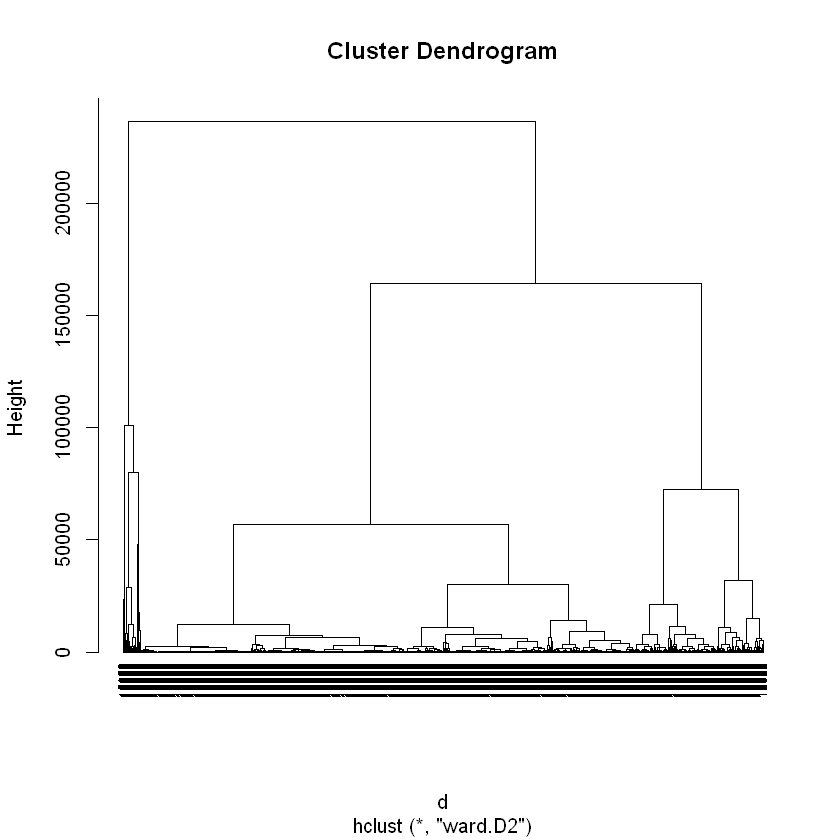

In [81]:
d <- dist(russian, method = "euclidean")
res.hc <- hclust(d, method = "ward.D2" )
plot(res.hc, cex = 0.6, hang = -1)

### strengths


It was easy to implement

We did not need to specify the number of clusters required for the algorithm.

### weaknesses

There was no mathematical objective for Hierarchical clustering.

High space and time complexity for Hierarchical clustering. Hence this clustering algorithm cannot be used when we have huge data.